In [597]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [598]:
df = pd.read_excel(r'C:\Users\SRK\Desktop\siva_python\Regression\intervention\Admission.xlsx')
#df = pd.read_excel('Admission.csv')


In [599]:
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


In [600]:
df.shape

(391, 19)

In [601]:
df.isna().sum()

SlNo                    0
Gender                  0
Percent_SSC             0
Board_SSC               0
Percent_HSC             0
Board_HSC               0
Stream_HSC              0
Percent_Degree          0
Course_Degree           0
Experience_Yrs          0
Entrance_Test          67
Percentile_ET           0
Percent_MBA             0
Specialization_MBA      0
Marks_Communication     0
Marks_Projectwork       0
Marks_BOCA              0
Placement               0
Salary                  0
dtype: int64

In [602]:
df['Entrance_Test'].fillna('NO Exam',inplace =True)

In [603]:
df.isna().sum()

SlNo                   0
Gender                 0
Percent_SSC            0
Board_SSC              0
Percent_HSC            0
Board_HSC              0
Stream_HSC             0
Percent_Degree         0
Course_Degree          0
Experience_Yrs         0
Entrance_Test          0
Percentile_ET          0
Percent_MBA            0
Specialization_MBA     0
Marks_Communication    0
Marks_Projectwork      0
Marks_BOCA             0
Placement              0
Salary                 0
dtype: int64

In [604]:
df[df.duplicated()]

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary


In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 391 non-null    int64  
 1   Gender               391 non-null    object 
 2   Percent_SSC          391 non-null    float64
 3   Board_SSC            391 non-null    object 
 4   Percent_HSC          391 non-null    float64
 5   Board_HSC            391 non-null    object 
 6   Stream_HSC           391 non-null    object 
 7   Percent_Degree       391 non-null    float64
 8   Course_Degree        391 non-null    object 
 9   Experience_Yrs       391 non-null    int64  
 10  Entrance_Test        391 non-null    object 
 11  Percentile_ET        391 non-null    float64
 12  Percent_MBA          391 non-null    float64
 13  Specialization_MBA   391 non-null    object 
 14  Marks_Communication  391 non-null    int64  
 15  Marks_Projectwork    391 non-null    int

In [606]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [607]:
df.Placement.value_counts

<bound method IndexOpsMixin.value_counts of 0          Placed
1          Placed
2          Placed
3          Placed
4          Placed
5          Placed
6          Placed
7          Placed
8          Placed
9          Placed
10     Not Placed
11         Placed
12         Placed
13         Placed
14         Placed
15     Not Placed
16         Placed
17         Placed
18         Placed
19     Not Placed
20         Placed
21         Placed
22         Placed
23         Placed
24         Placed
25         Placed
26         Placed
27         Placed
28         Placed
29         Placed
30         Placed
31         Placed
32         Placed
33         Placed
34         Placed
35         Placed
36         Placed
37         Placed
38         Placed
39     Not Placed
40         Placed
41     Not Placed
42     Not Placed
43         Placed
44         Placed
45         Placed
46         Placed
47         Placed
48         Placed
49         Placed
50         Placed
51         Placed
52         Placed
53

In [608]:
q1 =df.Salary.quantile(0.25)
q3 =df.Salary.quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr


In [609]:
df.shape

(391, 19)

In [610]:
#df = df[(df.Salary < ul) & (df.Salary != 0)]

In [611]:
df.shape

(391, 19)

In [612]:
#df.Salary = df.Salary.apply(lambda x : x**0.5)

In [613]:
numeric = df.select_dtypes(include=['float64', 'int64'])

In [614]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ff =scaler.fit_transform(numeric)
traintscalar =scaler.fit_transform(numeric)
scaledtrain = pd.DataFrame(traintscalar,columns =numeric.columns)
scaledtrain.shape

(391, 11)

In [615]:
cat =df.select_dtypes(include=['object'])
cat.shape

(391, 8)

In [616]:
df =pd.concat([cat,scaledtrain],axis =1)

In [617]:
df.shape

(391, 19)

In [618]:
q1 =df.Salary.quantile(0.25)
q3 =df.Salary.quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr

In [619]:
df = df[(df.Salary < ul) & (df.Salary != 0)]


#df.Salary = df.Salary.apply(lambda x : x**0.5)
#numeric = df.select_dtypes(include=['float64', 'int64'])


In [620]:
df = df[df['Placement'] !='Not Placed']

In [621]:
df.shape

(303, 19)

In [622]:
import pandas_profiling# for EDA 

profile = df.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
profile.to_file(output_file="output.html")

sns.pairplot(df)

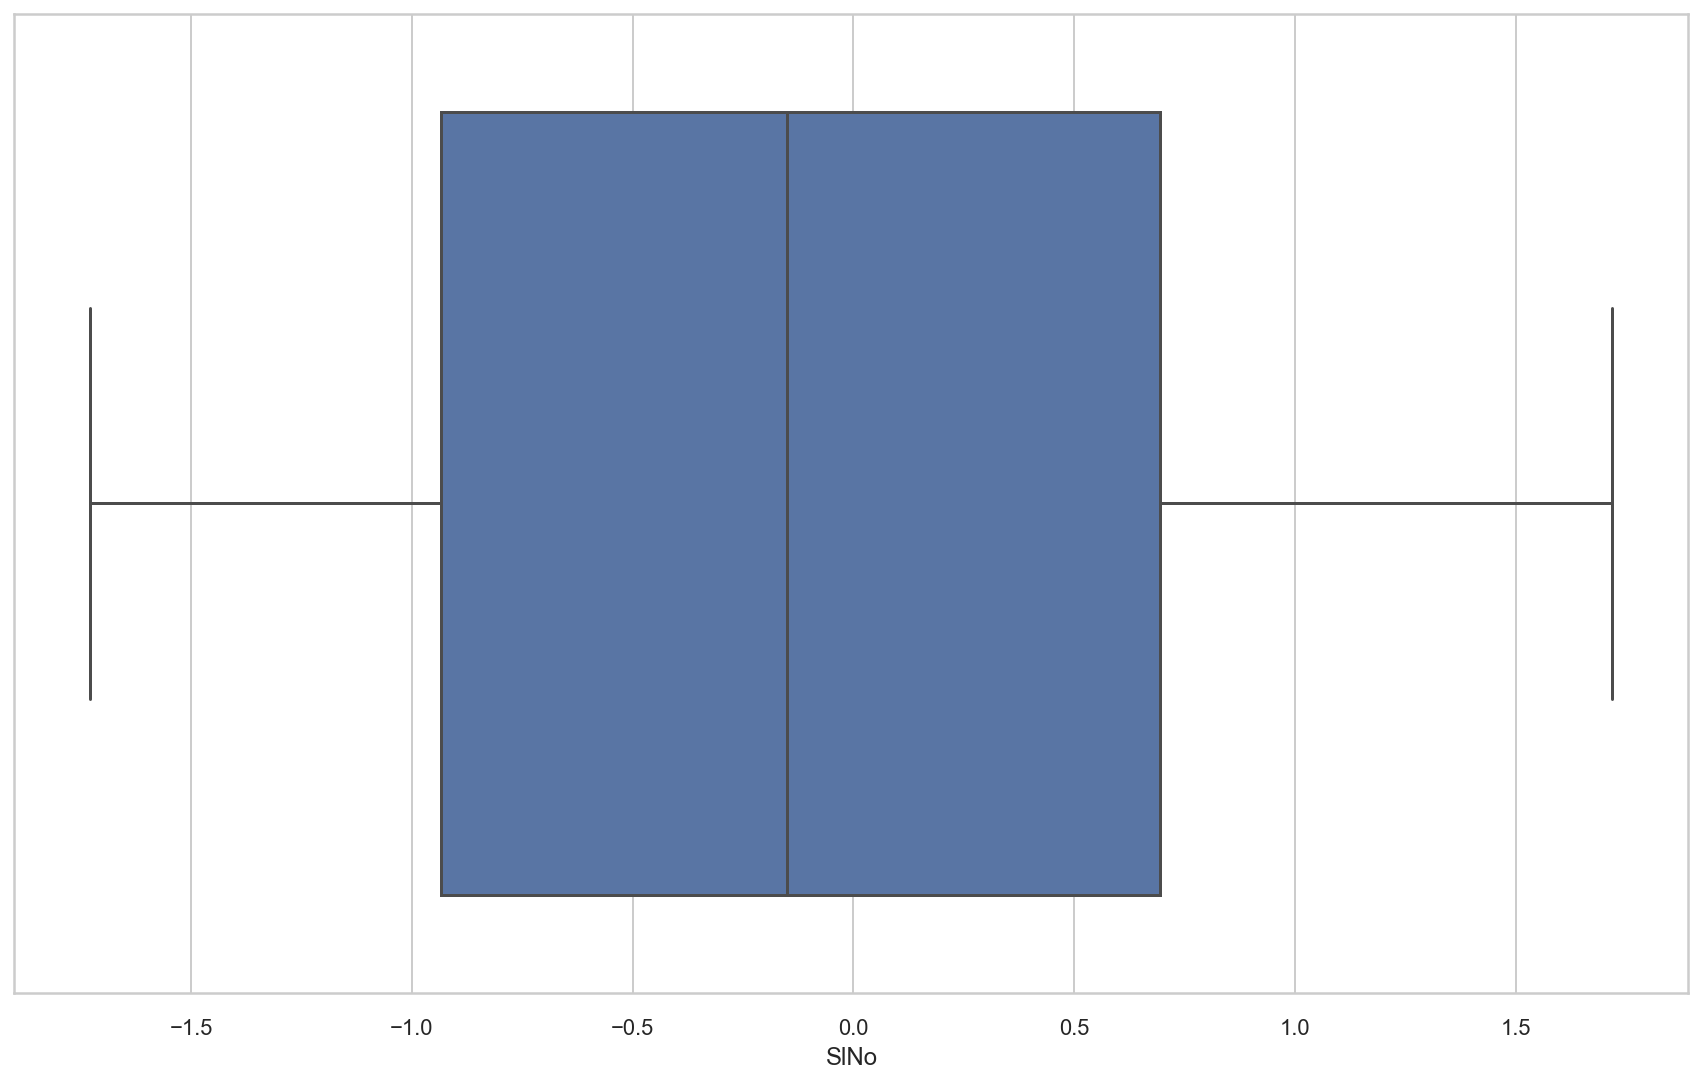

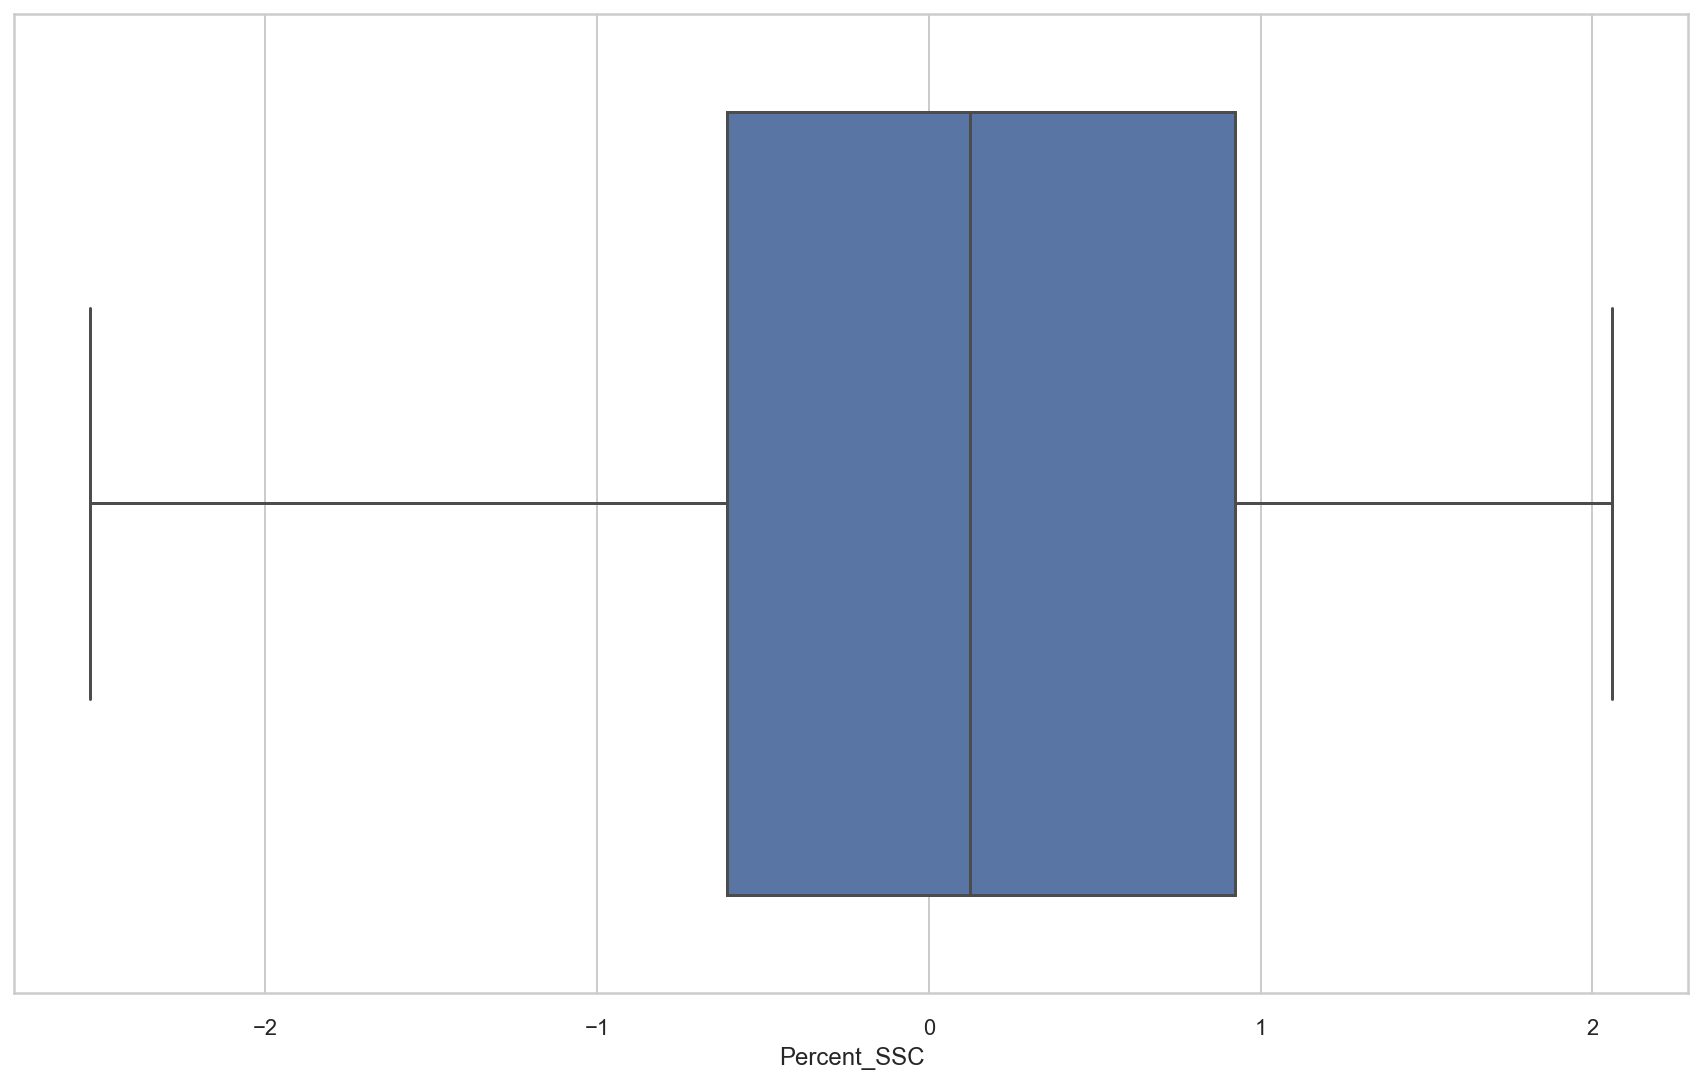

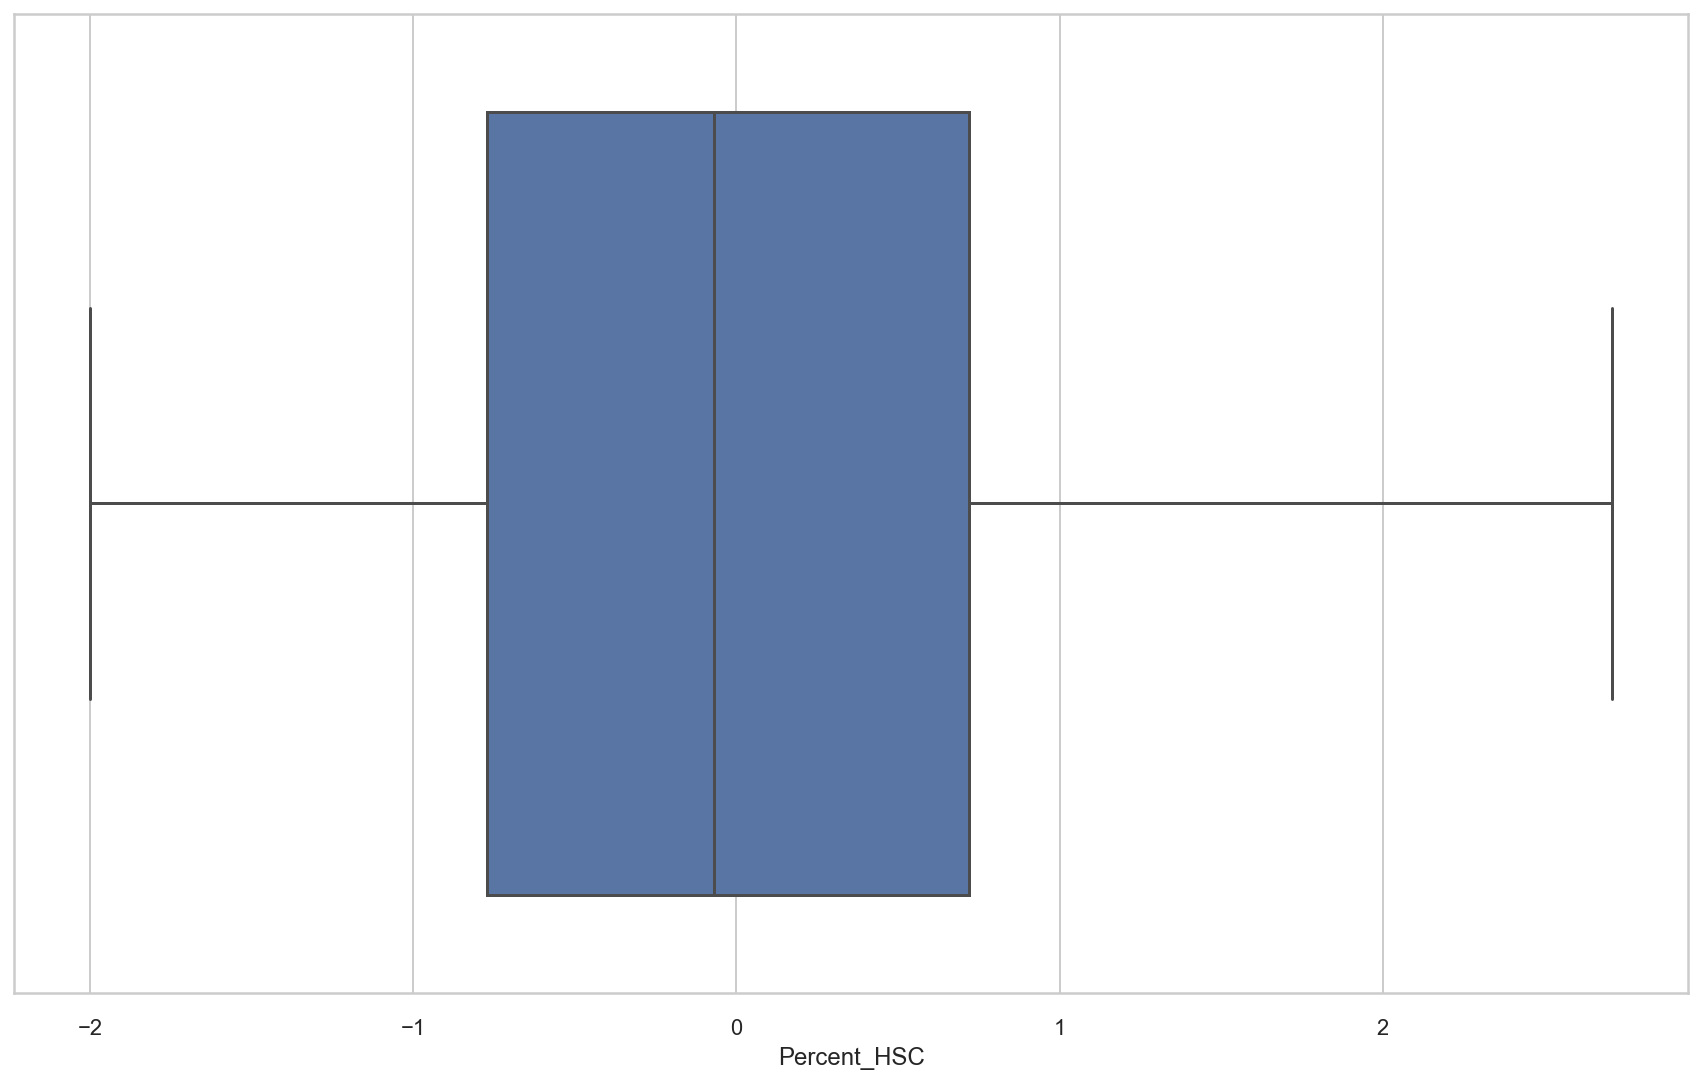

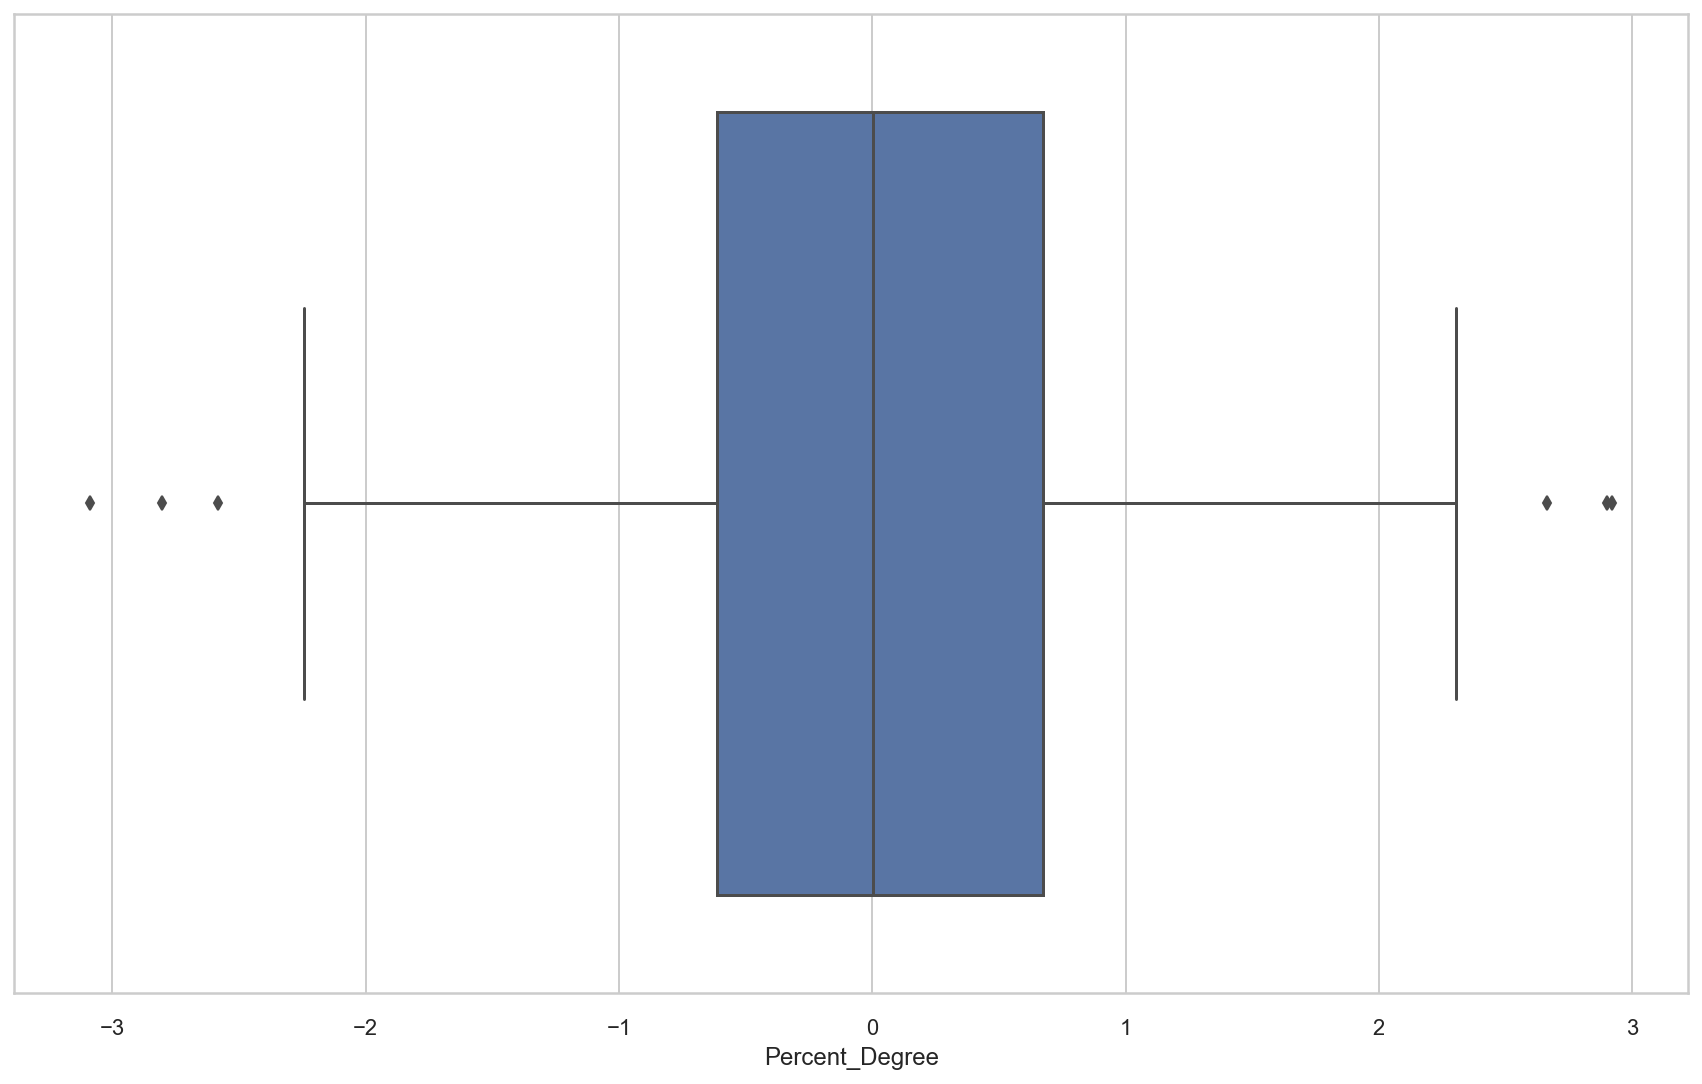

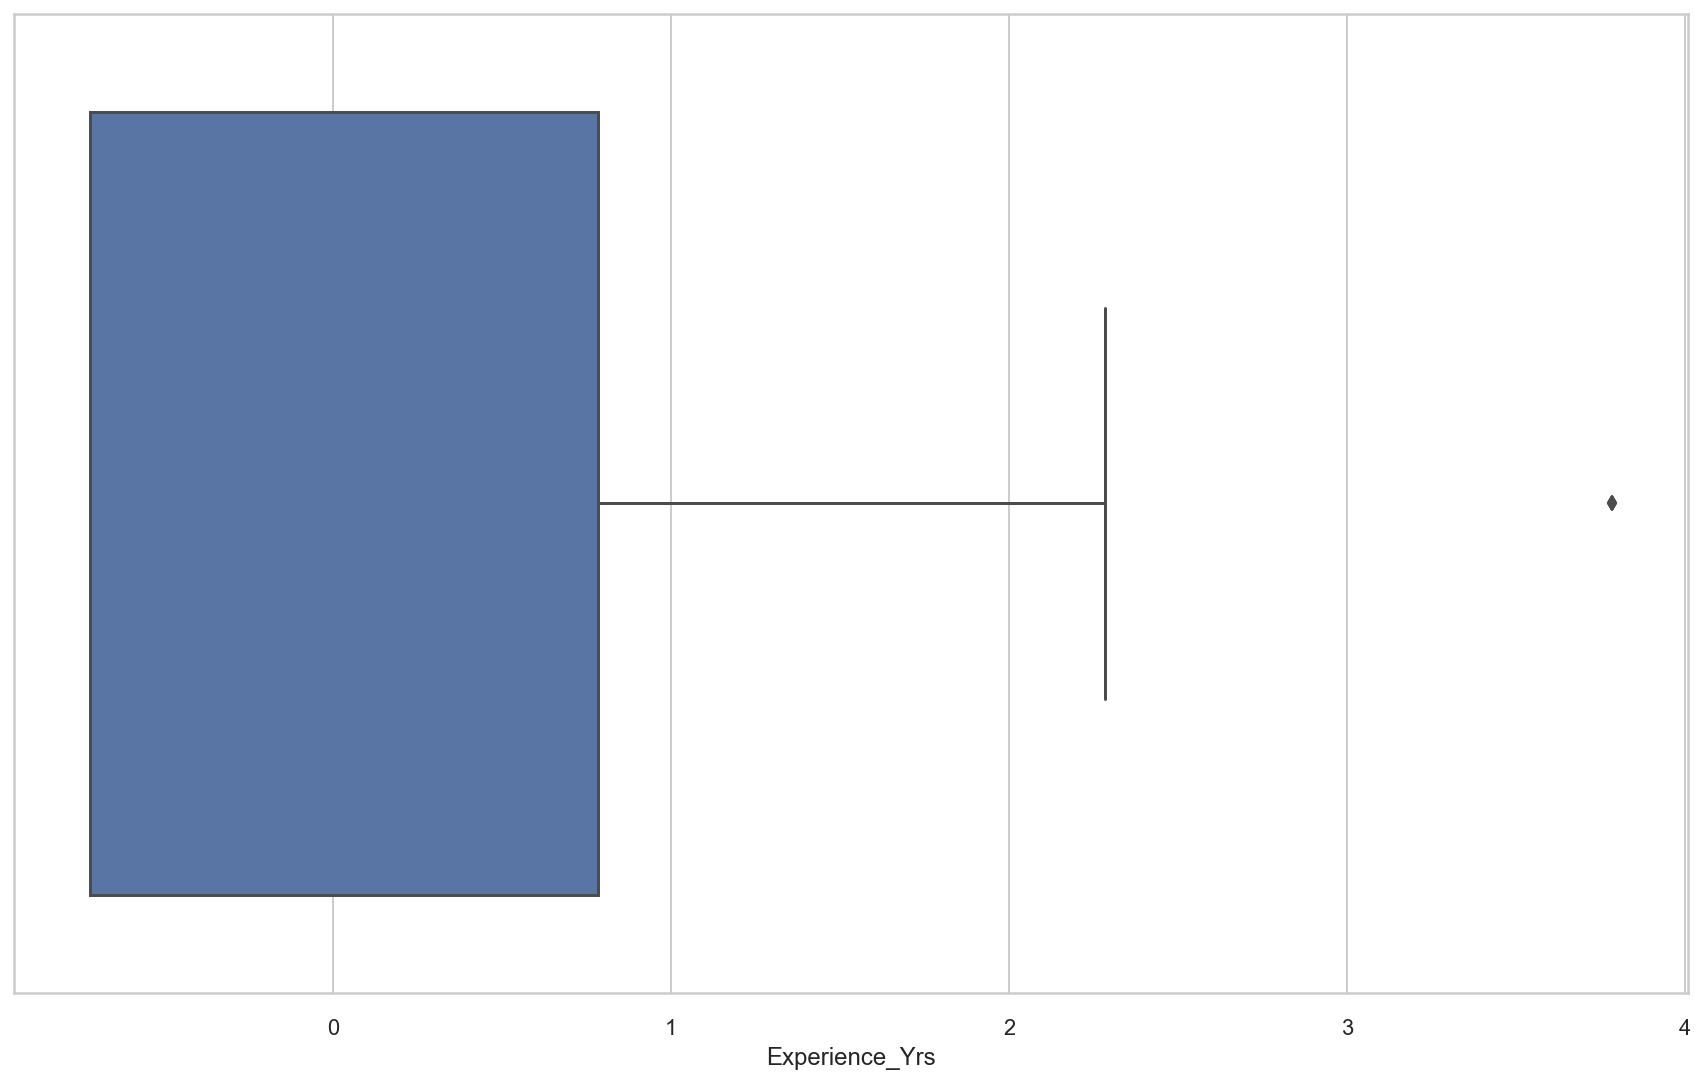

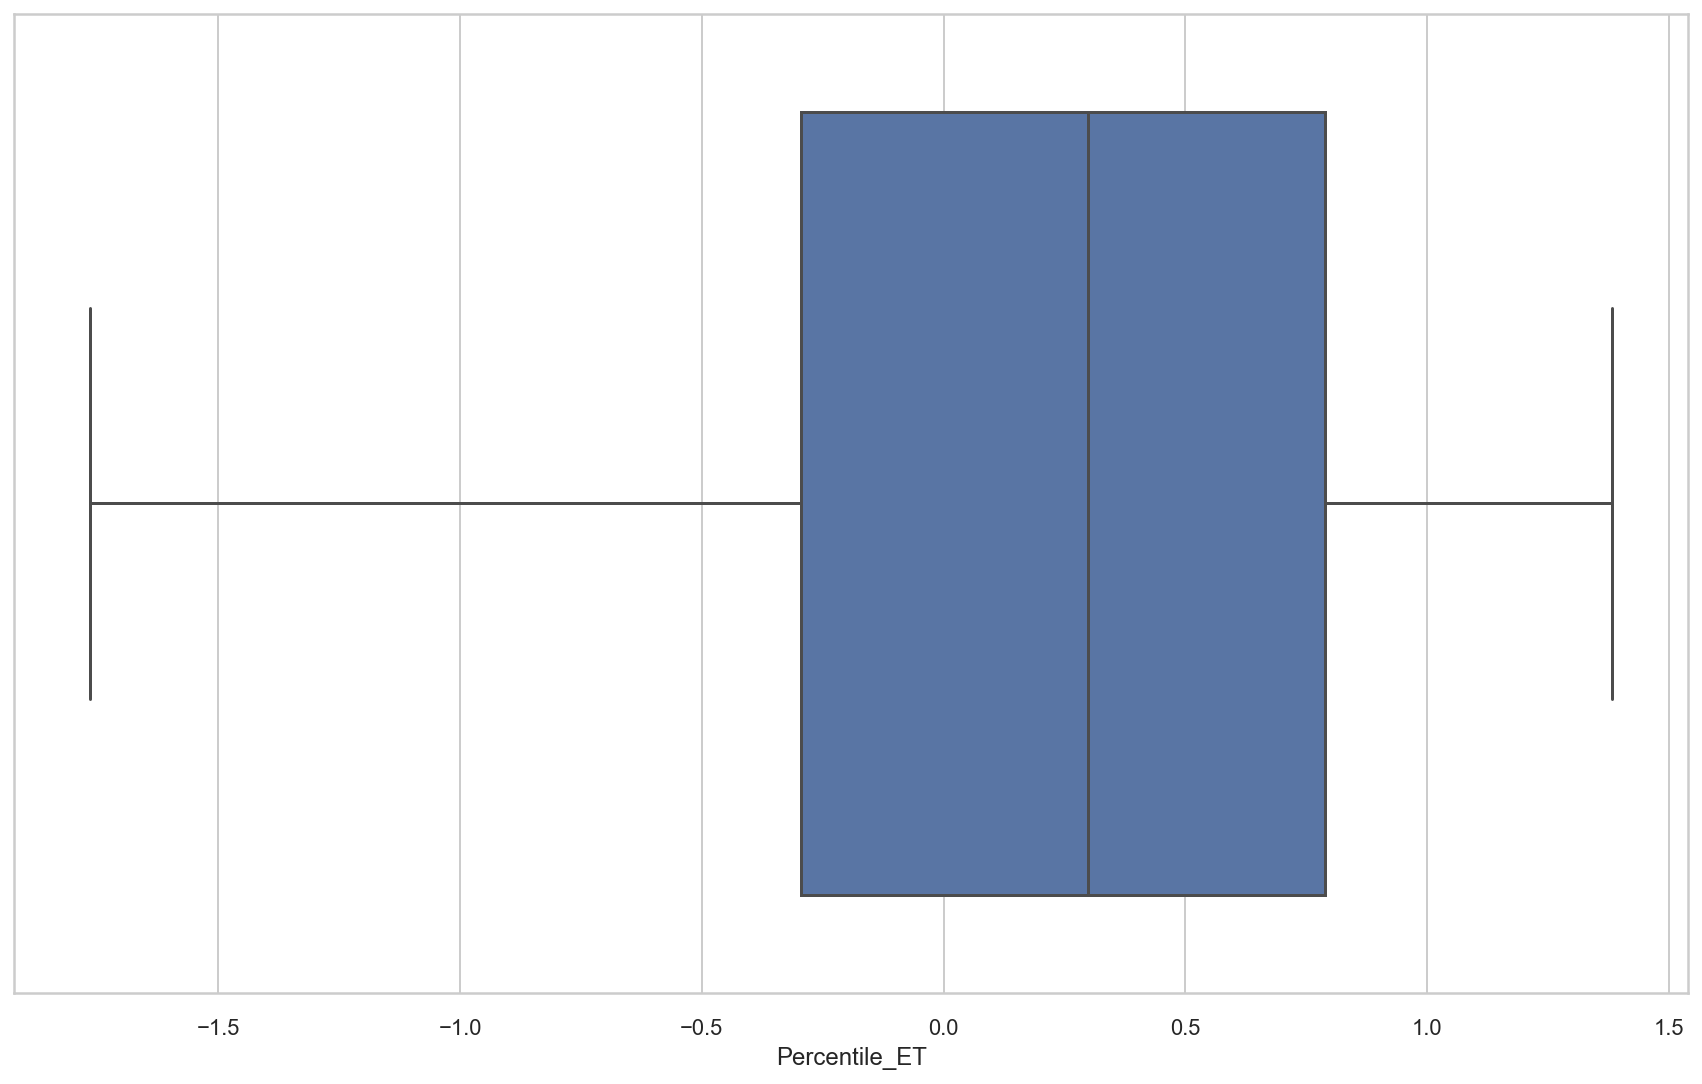

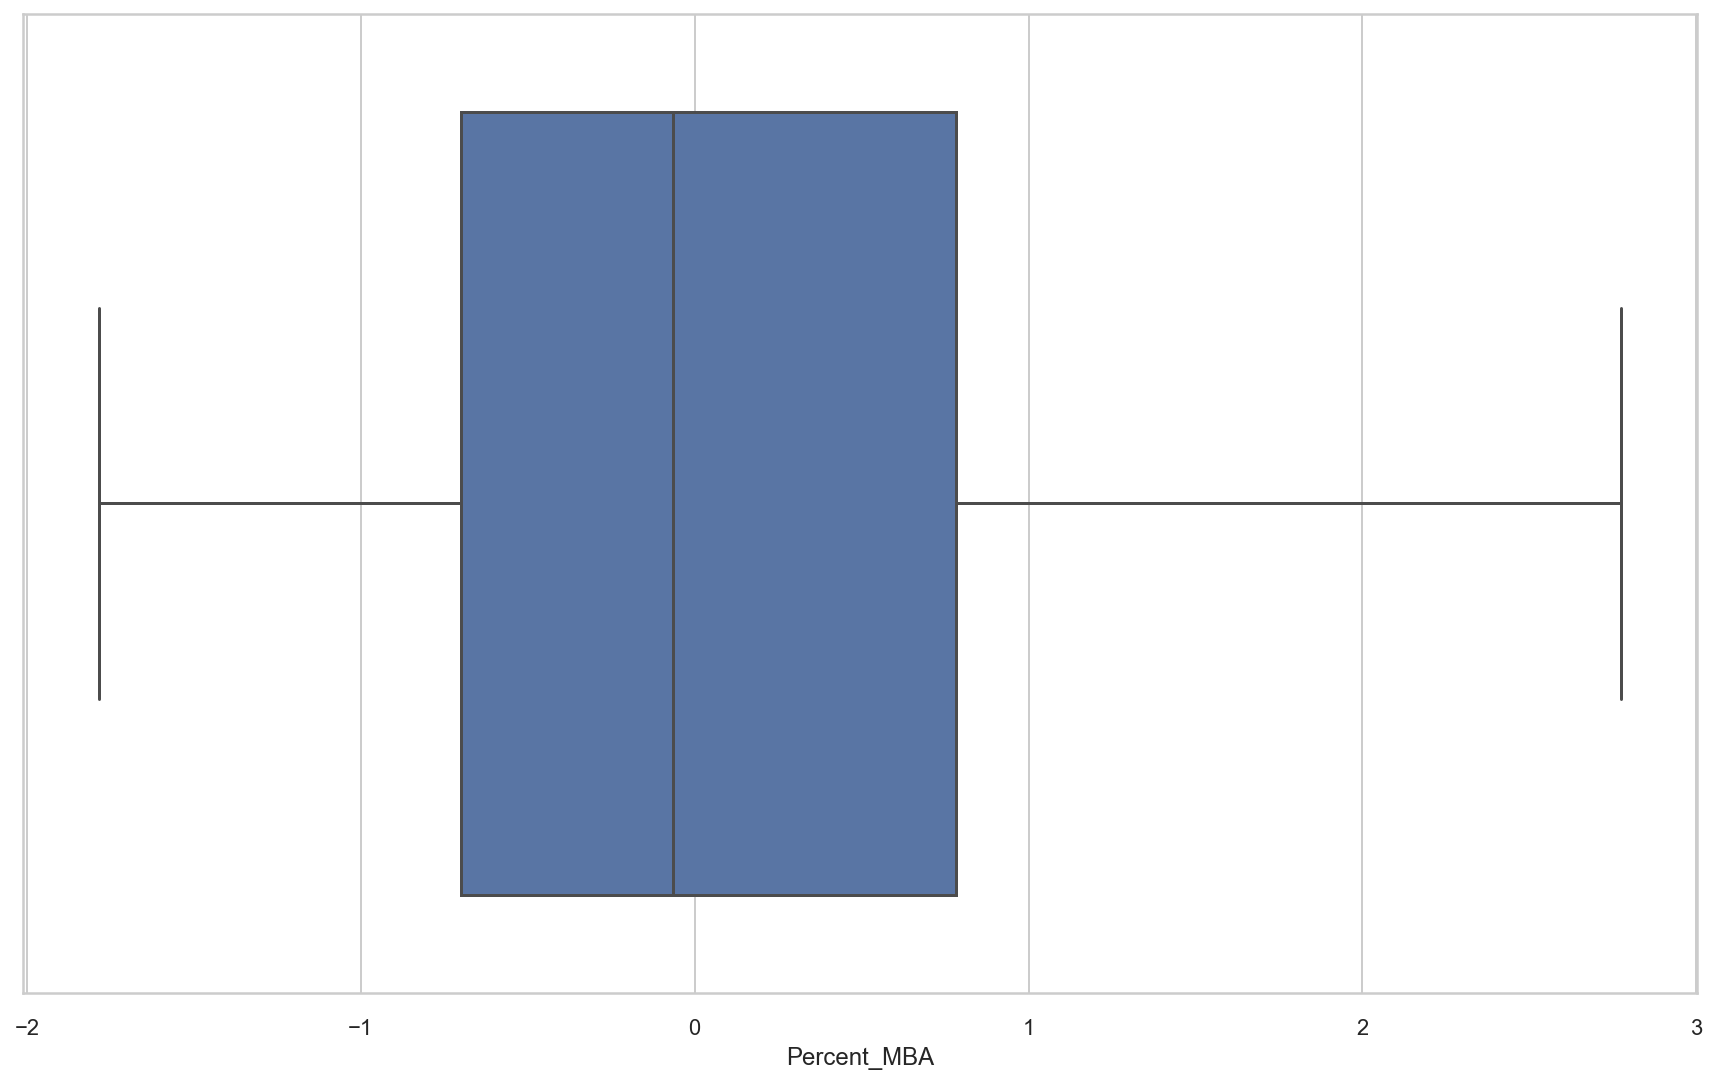

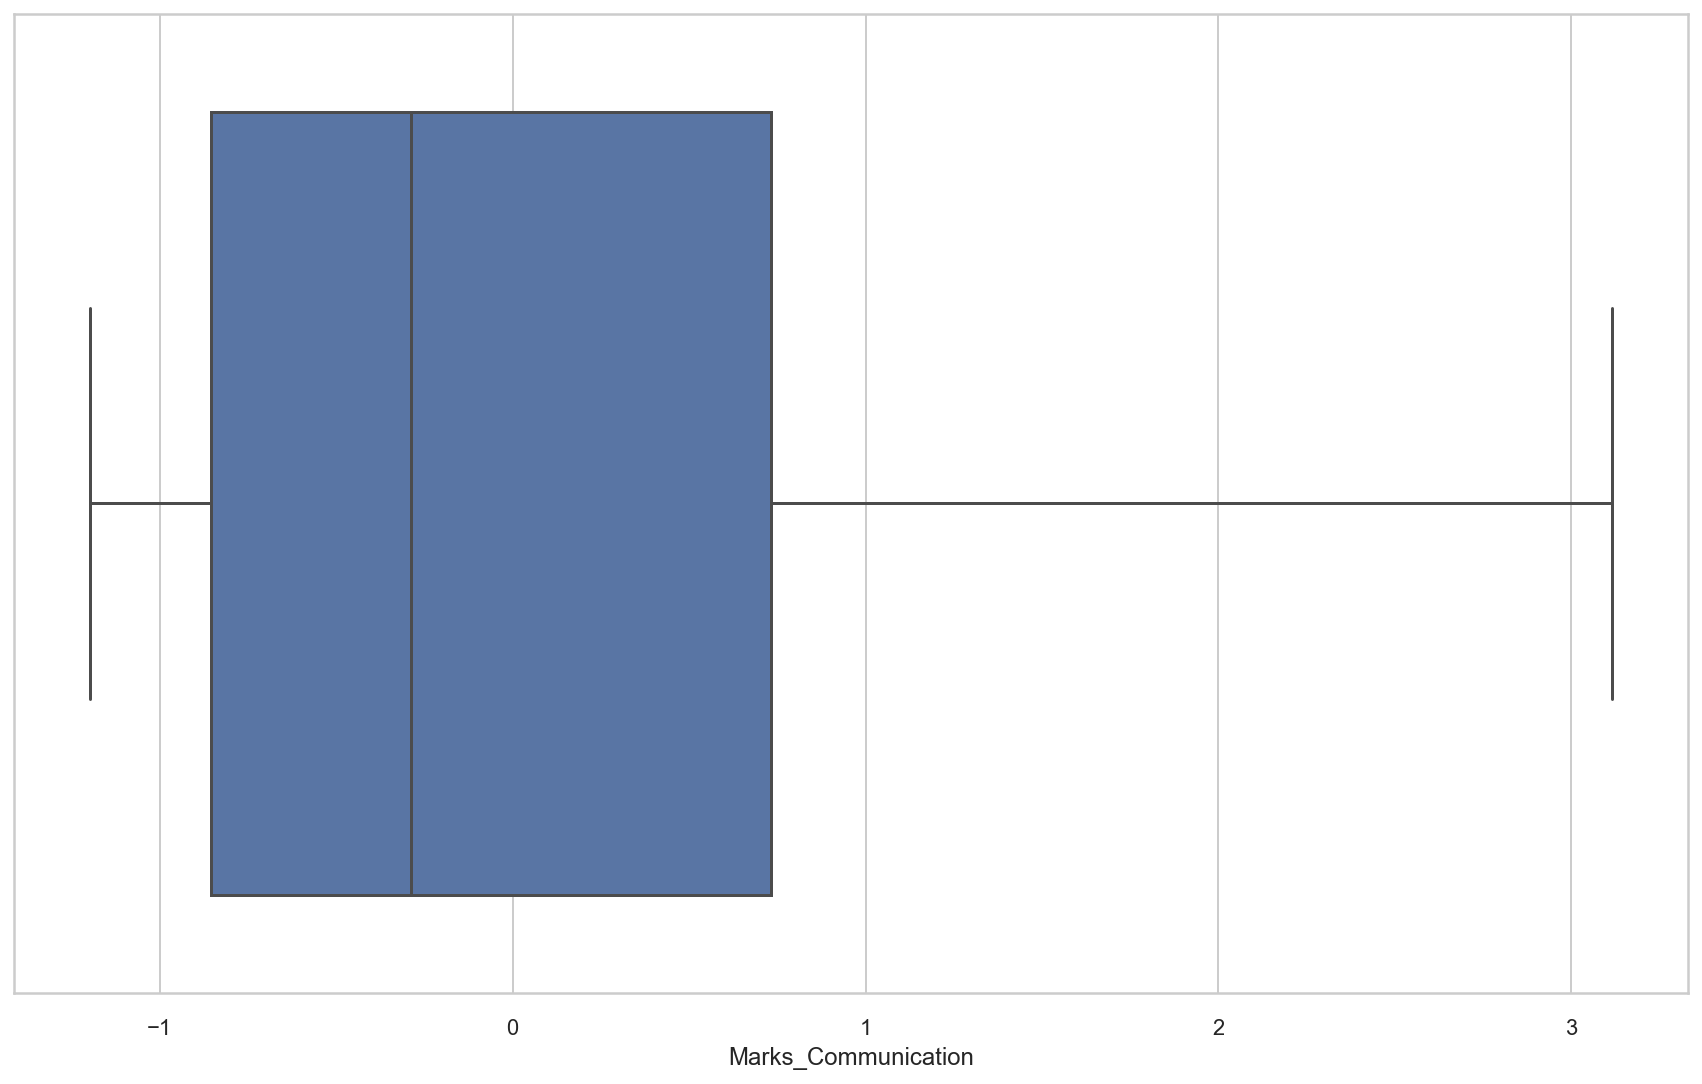

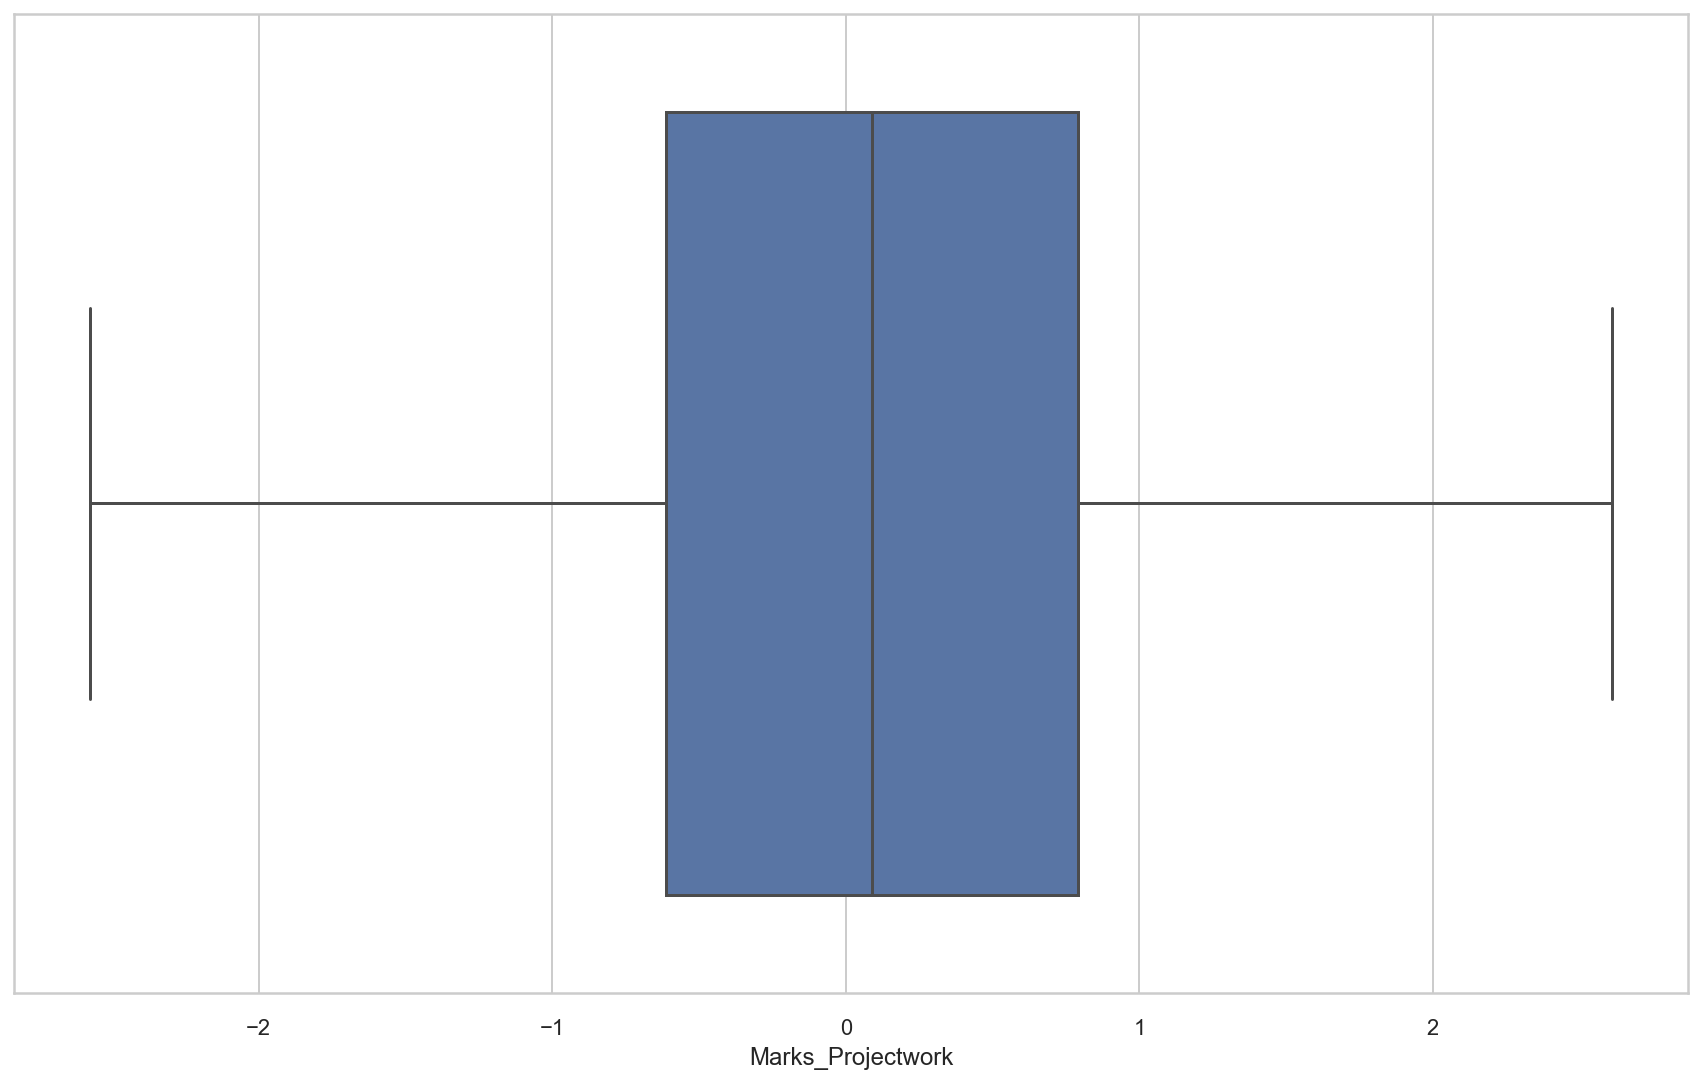

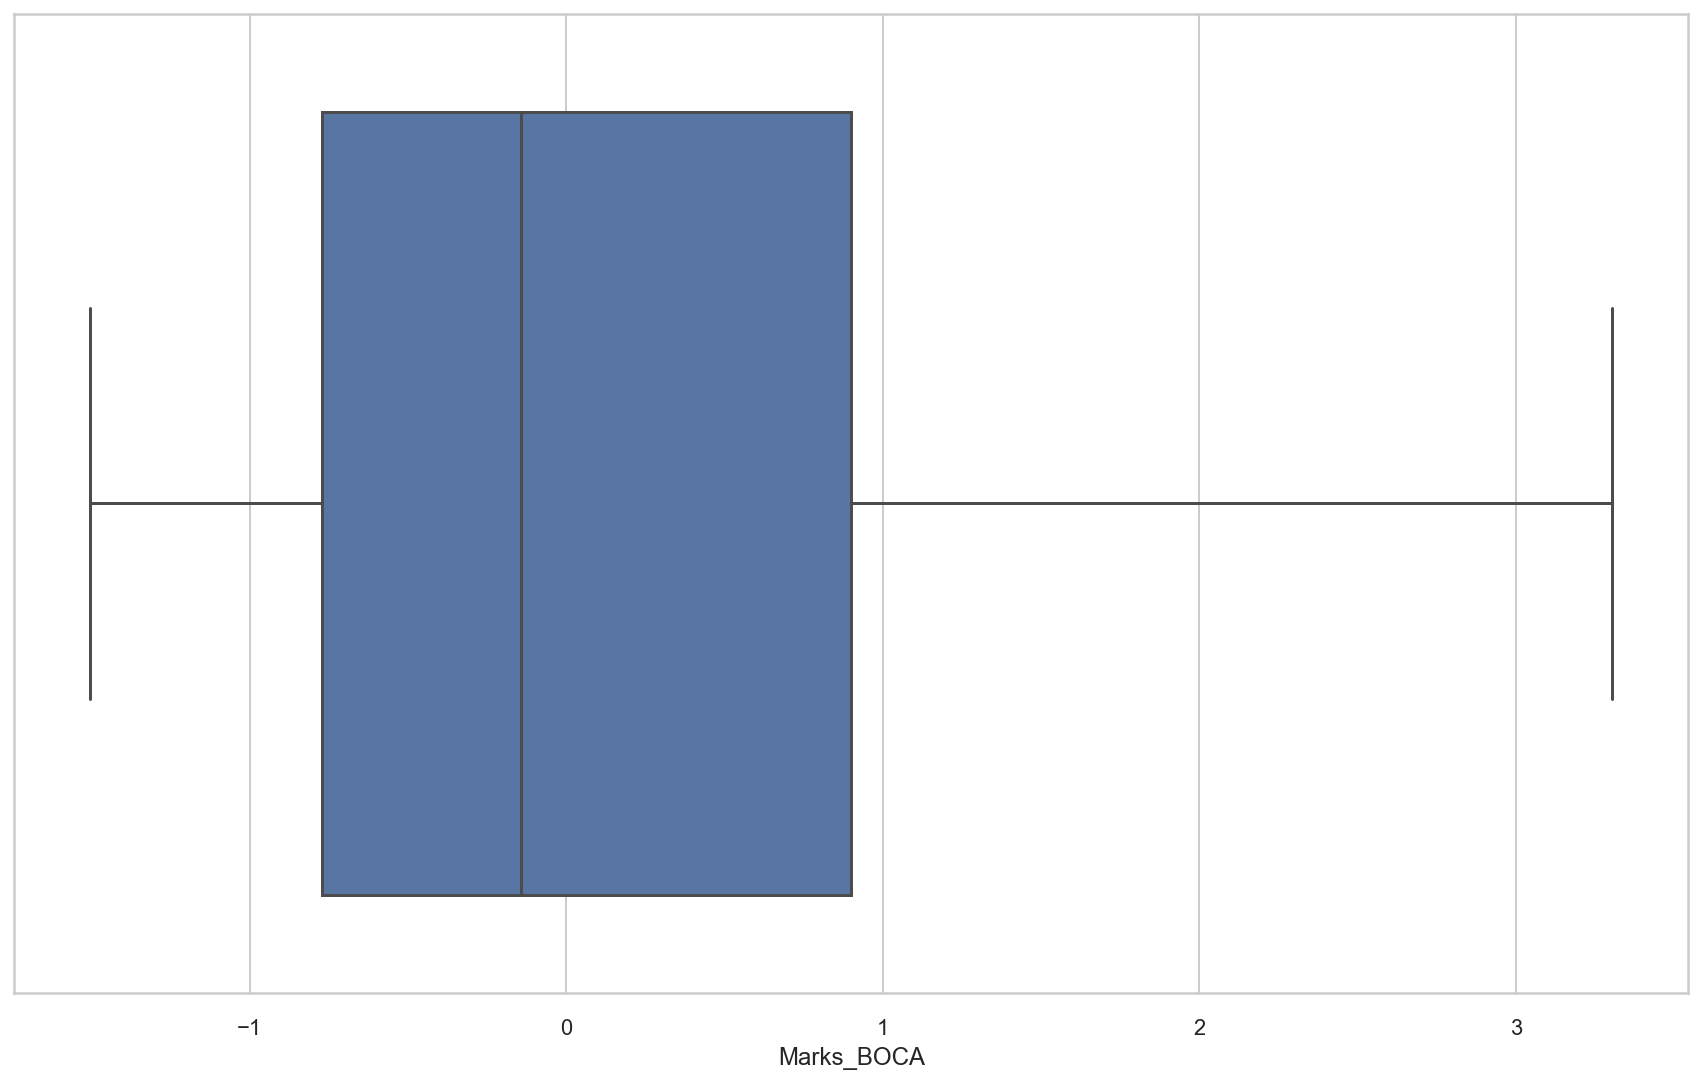

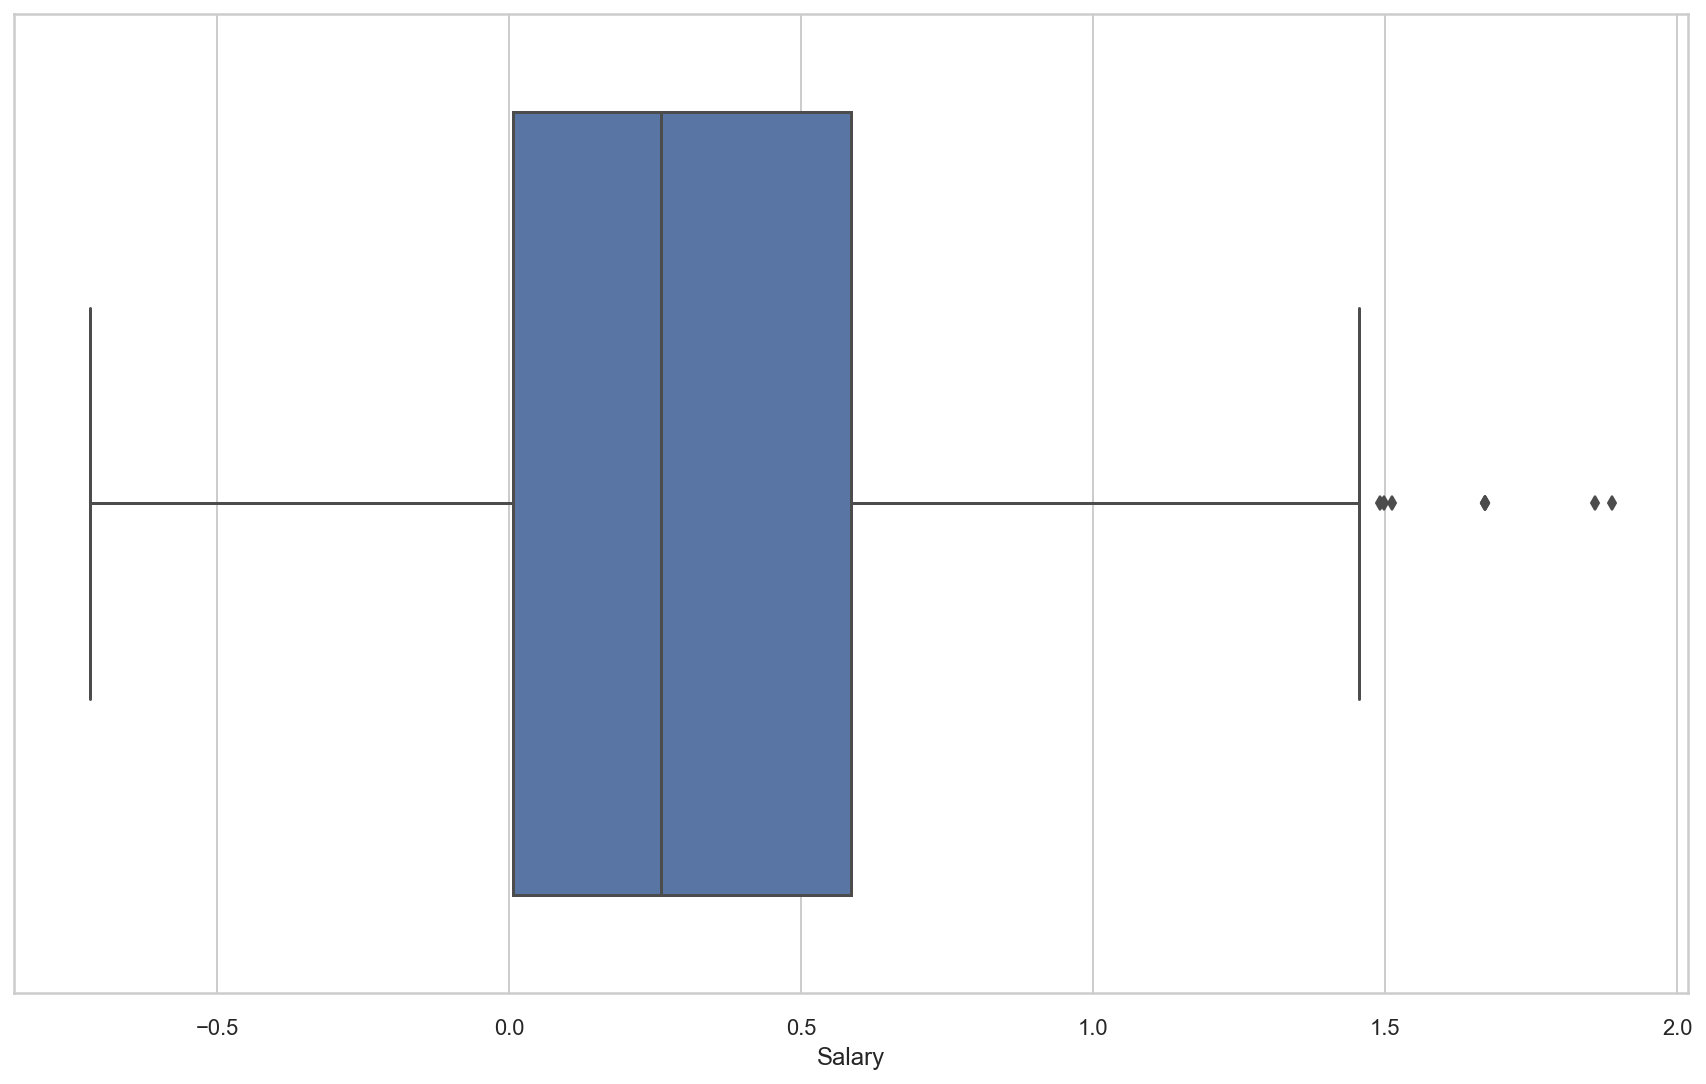

In [623]:
for i in df.select_dtypes(include=['float64', 'int64']).columns:
    
    sns.boxplot(data =df,x = i)
    plt.show()

for i in df.select_dtypes(include=['object']).columns:
    pd.


In [624]:
cols = [ i for i in df.columns if df[i].dtype=='O']
df =pd.get_dummies(df,columns = cols,drop_first=True)
df.shape

(303, 34)

In [625]:
df.head()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_M,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Commerce,Stream_HSC_Science,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_NO Exam,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB
0,-1.727627,-0.242304,2.122640,-1.233456,-0.717830,0.002089,-0.490464,-1.195948,-0.471300,1.005320,0.368638,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,-1.718767,1.066802,1.011540,1.403341,0.783088,1.014028,0.788845,0.960009,0.229378,1.109806,-0.138113,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-1.709907,0.671239,1.245686,0.409489,-0.717830,-1.764787,-1.497834,-1.195948,-1.031841,-0.561985,0.151459,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-1.701048,-0.425012,-0.069744,-0.559657,-0.717830,0.644590,-0.661495,-0.742062,-0.331164,-0.248524,0.223852,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,-1.692188,-0.333658,-0.771306,-1.008856,0.783088,0.355465,-0.382715,-0.969005,-0.471300,0.273911,-0.282900,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [626]:
df.columns

Index(['SlNo', 'Percent_SSC', 'Percent_HSC', 'Percent_Degree',
       'Experience_Yrs', 'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
       'Marks_Projectwork', 'Marks_BOCA', 'Salary', 'Gender_M',
       'Board_SSC_ICSE', 'Board_SSC_Others', 'Board_HSC_ISC',
       'Board_HSC_Others', 'Stream_HSC_Commerce', 'Stream_HSC_Science',
       'Course_Degree_Commerce', 'Course_Degree_Computer Applications',
       'Course_Degree_Engineering', 'Course_Degree_Management',
       'Course_Degree_Others', 'Course_Degree_Science', 'Entrance_Test_G-MAT',
       'Entrance_Test_G-SAT', 'Entrance_Test_GCET', 'Entrance_Test_K-MAT',
       'Entrance_Test_MAT', 'Entrance_Test_NO Exam', 'Entrance_Test_PGCET',
       'Entrance_Test_XAT', 'Specialization_MBA_Marketing & HR',
       'Specialization_MBA_Marketing & IB'],
      dtype='object')

cs = [i for i in df.columns if df[i].dtype == 'object']
dd =df[cs]
df1 = OneHotEncoder(categories  = 'Gender').fit_transform(dd)
df1.head()

In [627]:
df1.shape

(391, 35)

cat_columns_idx = [df.columns.get_loc(col) for col in cs]

from sklearn.preprocessing import OneHotEncoder 
for i in df.select_dtypes(include=['object']).columns:

    onehotencoder = OneHotEncoder(categories=cat_columns_idx) #,drop ='first'
    data = onehotencoder.fit_transform(df[df.select_dtypes(include=['object']).columns])
   



In [628]:
y =df['Salary']
x = df.drop(columns ='Salary')

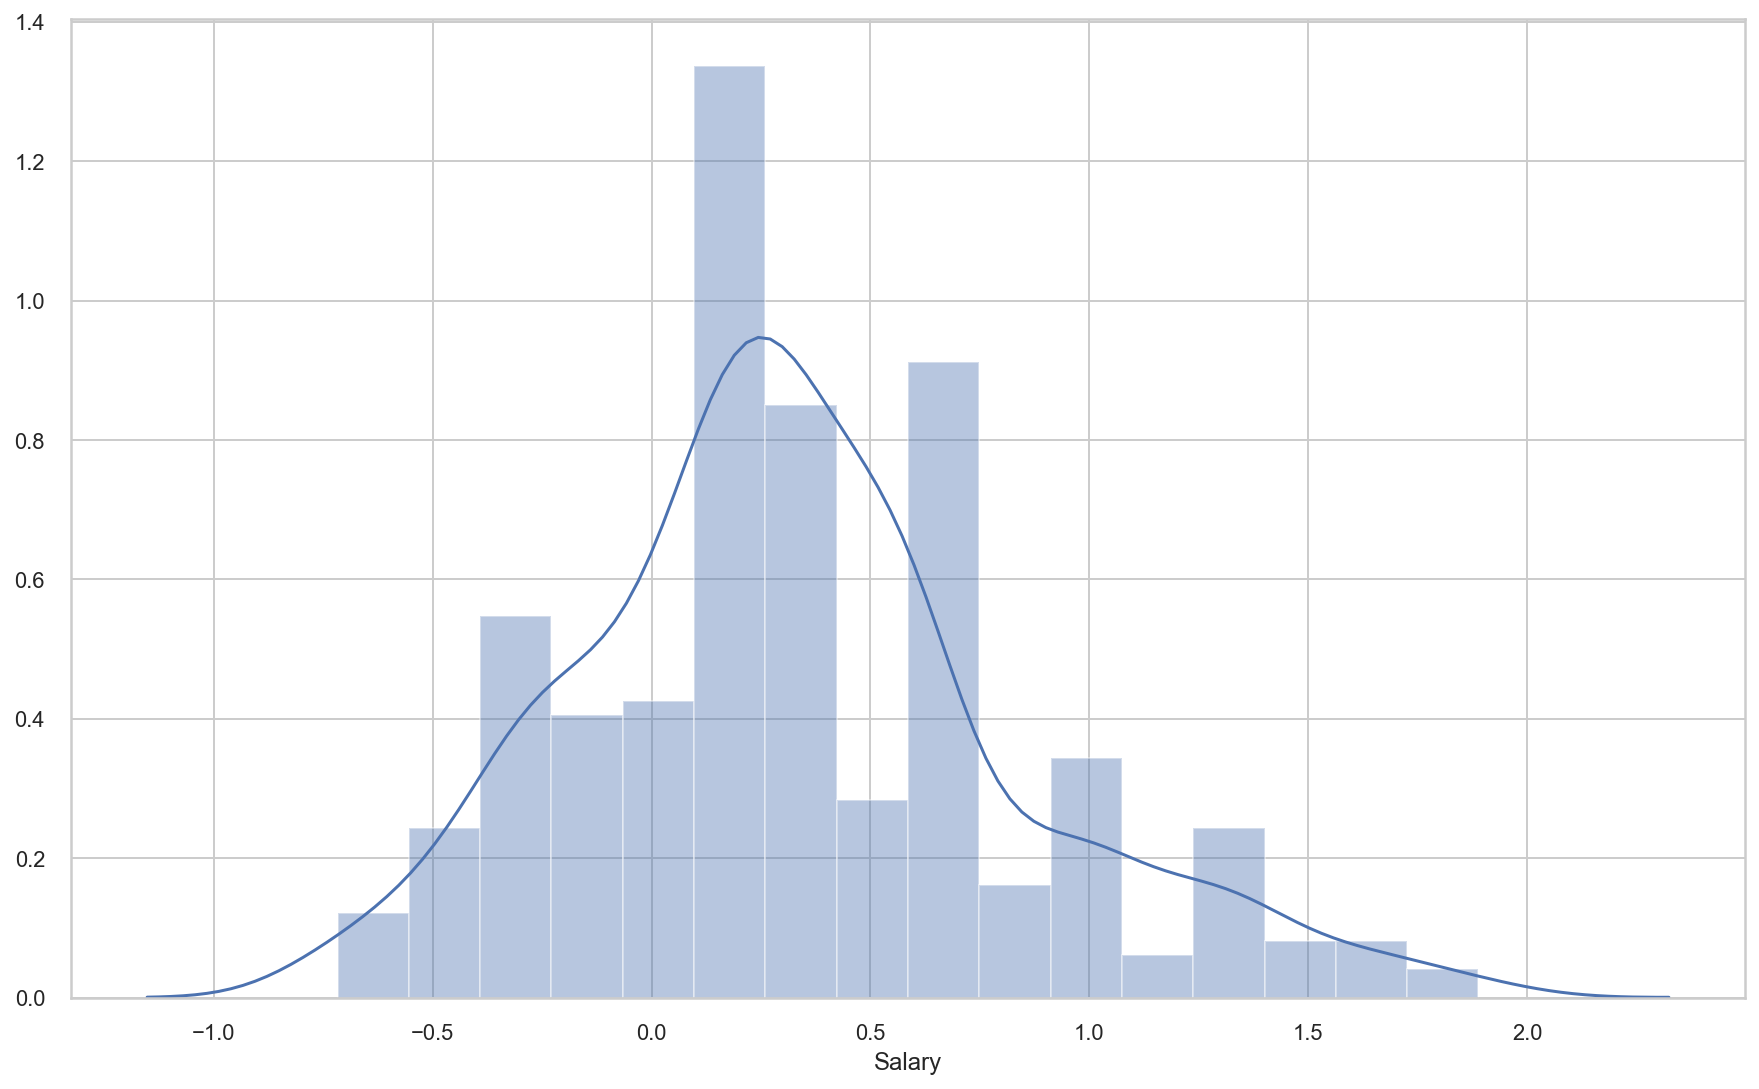

In [629]:
sns.distplot(df.Salary)

In [630]:
import statsmodels.api as sm 
X = sm.add_constant(x)

lm = sm.OLS(y, X).fit() 
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     2.924
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           9.29e-07
Time:                        16:16:34   Log-Likelihood:                -174.50
No. Observations:                 303   AIC:                             417.0
Df Residuals:                     269   BIC:                             543.3
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.6193      0.218      2.847      0.005       0.191       1.048
SlNo                                    0.0083      0.028      0.293      0.770      -0.048       0.064
Percent_SSC                             0.0832      0.037      2.221      0.027       0.009       0.157
Percent_HSC                            -0.0204      0.038     -0.540      0.590      -0.095       0.054
Percent_Degree                          0.0196      0.034      0.574      0.566      -0.048       0.087
Experience_Yrs                          0.0105      0.030      0.356      0.722      -0.048       0.069
Percentile_ET                           0.0509      0.058      0.871      0.385      -0.064       0.166
Percent_MBA                             0.0735      0.048      1.537      0.126      -0.021       0.168
Marks_Communication                     0.0401      0.041      0.985      0.326      -0.040       0.120
Marks_Projectwork                       0.0031      0.032      0.096      0.924      -0.060       0.066
Marks_BOCA                             -0.0010      0.033     -0.030      0.976      -0.066       0.064
Gender_M                                0.2411      0.064      3.741      0.000       0.114       0.368
Board_SSC_ICSE                         -0.2425      0.108     -2.242      0.026      -0.455      -0.029
Board_SSC_Others                       -0.1201      0.090     -1.330      0.185      -0.298       0.058
Board_HSC_ISC                           0.2462      0.123      1.996      0.047       0.003       0.489
Board_HSC_Others                        0.0932      0.091      1.028      0.305      -0.085       0.272
Stream_HSC_Commerce                     0.1051      0.156      0.673      0.502      -0.202       0.413
Stream_HSC_Science                      0.0925      0.164      0.563      0.574      -0.231       0.416
Course_Degree_Commerce                 -0.1285      0.187     -0.689      0.492      -0.496       0.239
Course_Degree_Computer Applications    -0.1402      0.200     -0.701      0.484      -0.534       0.253
Course_Degree_Engineering              -0.1478      0.194     -0.761      0.448      -0.530       0.235
Course_Degree_Management               -0.2491      0.176     -1.415      0.158      -0.596       0.097
Course_Degree_Others                   -0.3094      0.287     -1.078      0.282      -0.875       0.256
Course_Degree_Science                  -0.2089      0.199     -1.051      0.294      -0.601       0.183
Entrance_Test_G-MAT                     0.0107      0.490      0.022      0.983      -0.954       0.976
Entrance_Test_G-SAT                    -0.4484      0.504     -0.891      0.374      -1.440       0.543
Entrance_Test_GCET                     -0.1955      0.362     -0.54

## Check for linearity- Rainbow Test

In [631]:
sm.stats.diagnostic.linear_rainbow(lm, frac=0.5)

(0.9943428759677956, 0.5158539860446287)

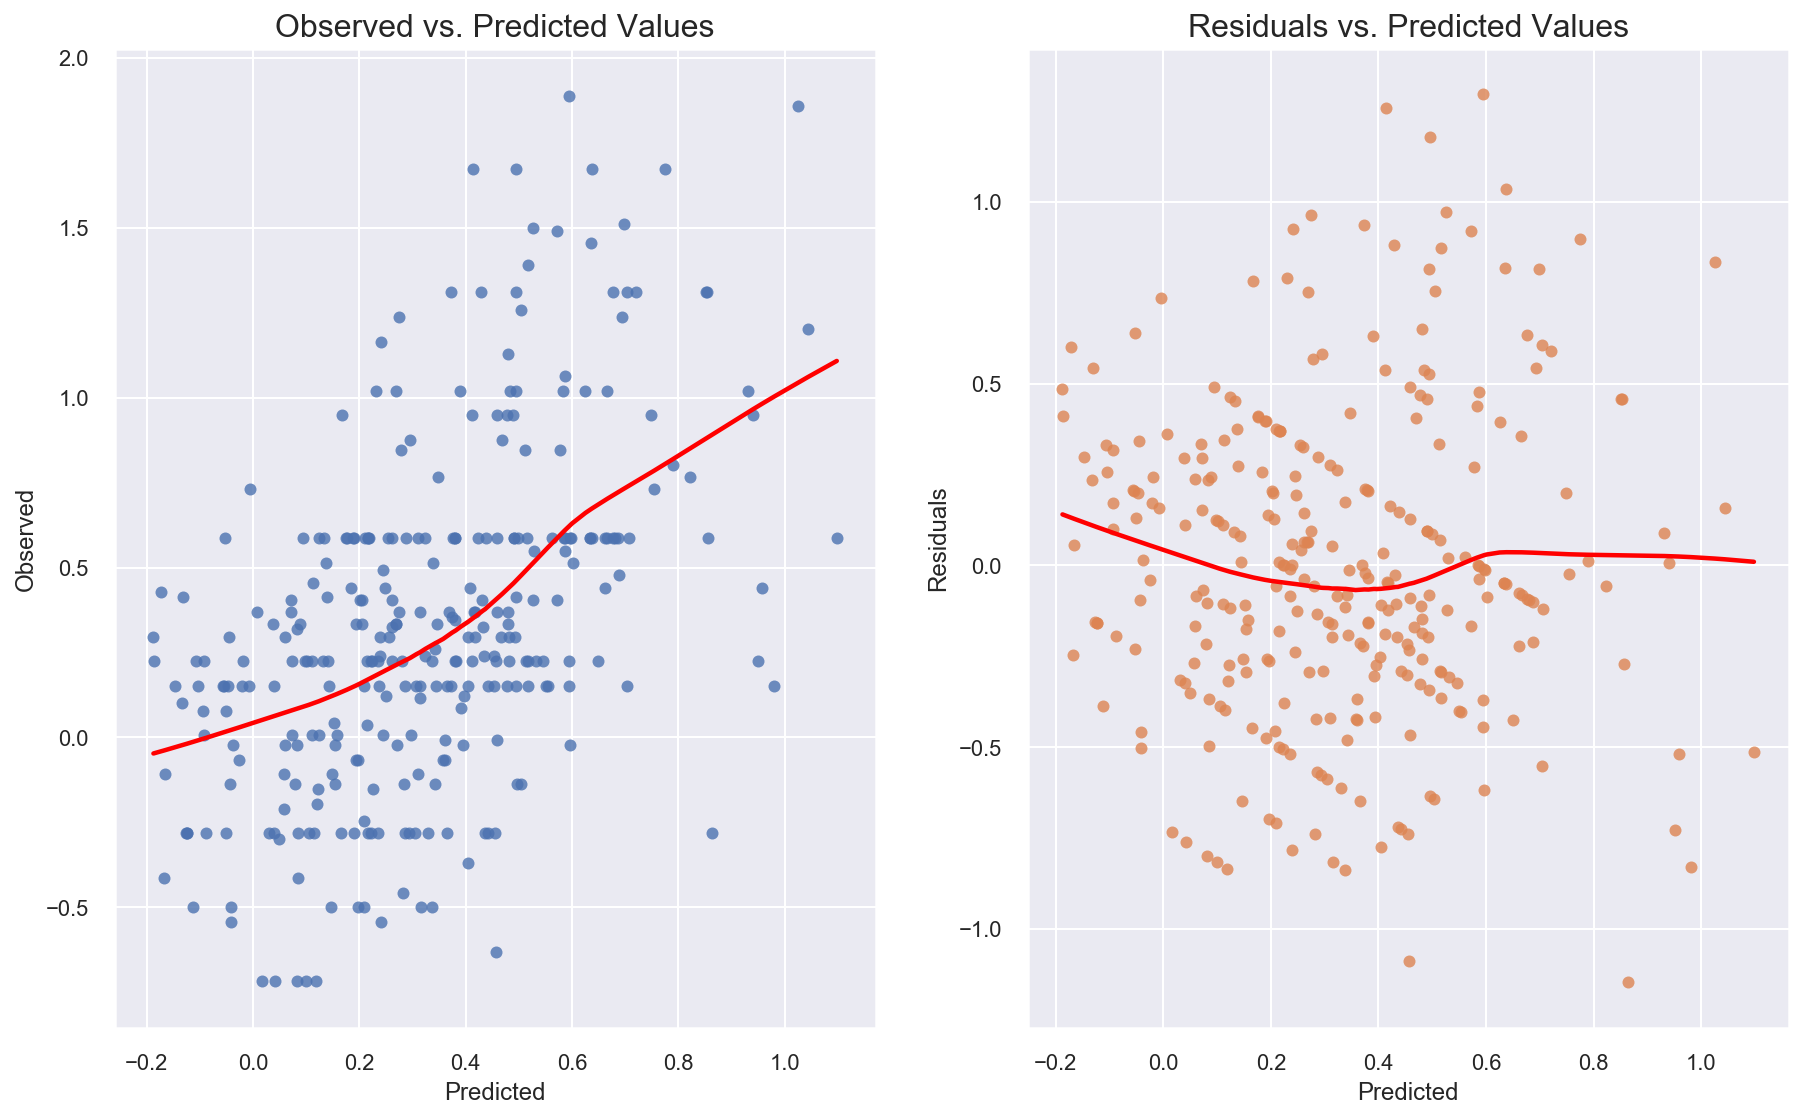

In [632]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = lm.predict()
    resids = lm.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lm, y)  

it is linear

## Test for Multicollinearity

In [633]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
#vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

vif=[variance_inflation_factor(X.values, col) for col in range(0, X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,const,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Gender_M,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Commerce,Stream_HSC_Science,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_NO Exam,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB
vif,68.739532,1.144396,2.020263,1.847939,1.688624,1.203022,4.89864,3.219499,2.485675,1.454655,1.672257,1.305676,2.595172,2.960571,2.258039,2.79892,8.725729,9.345779,10.617137,4.231201,4.301864,10.95674,1.558751,3.70507,1.147438,1.211174,1.2475,2.198353,4.390648,5.709601,1.376814,1.102241,1.335961,1.165156


## Assumption 2- Normality of Residuals

(4.2470819926847385, 0.11960734858408939)


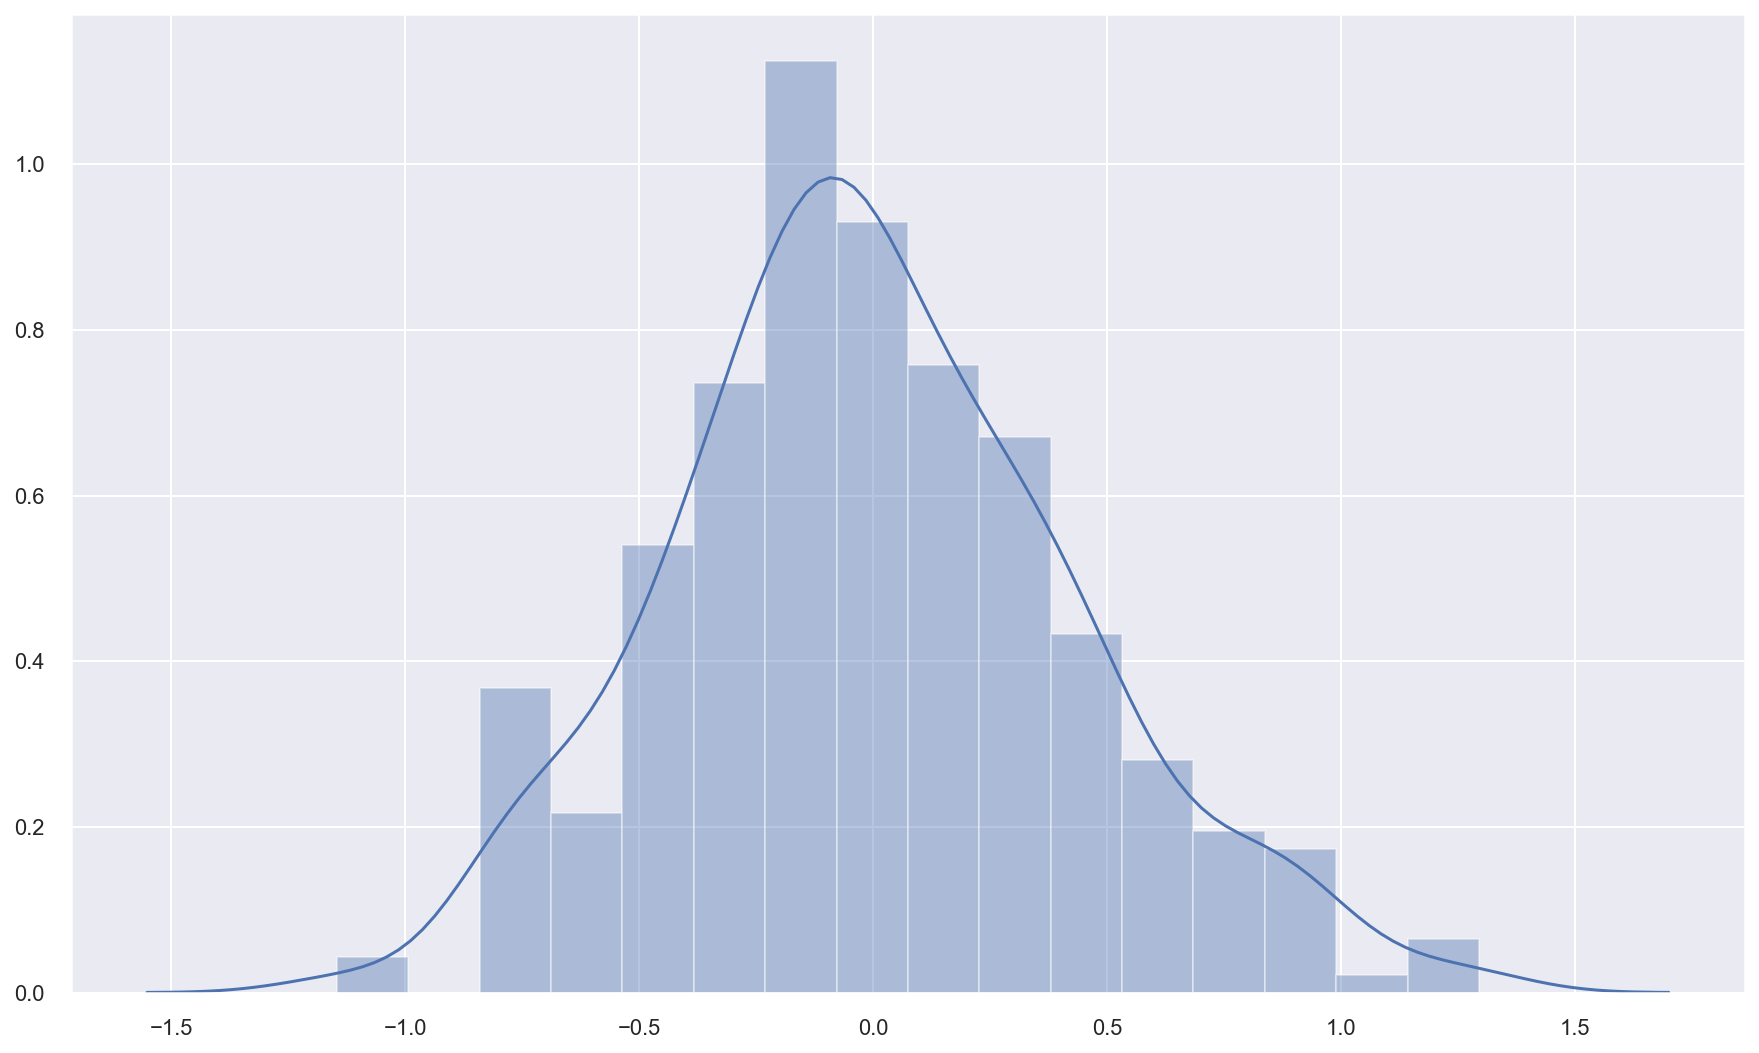

In [634]:
from scipy import stats
print(stats.jarque_bera(lm.resid))
import seaborn as sns

sns.distplot(lm.resid)

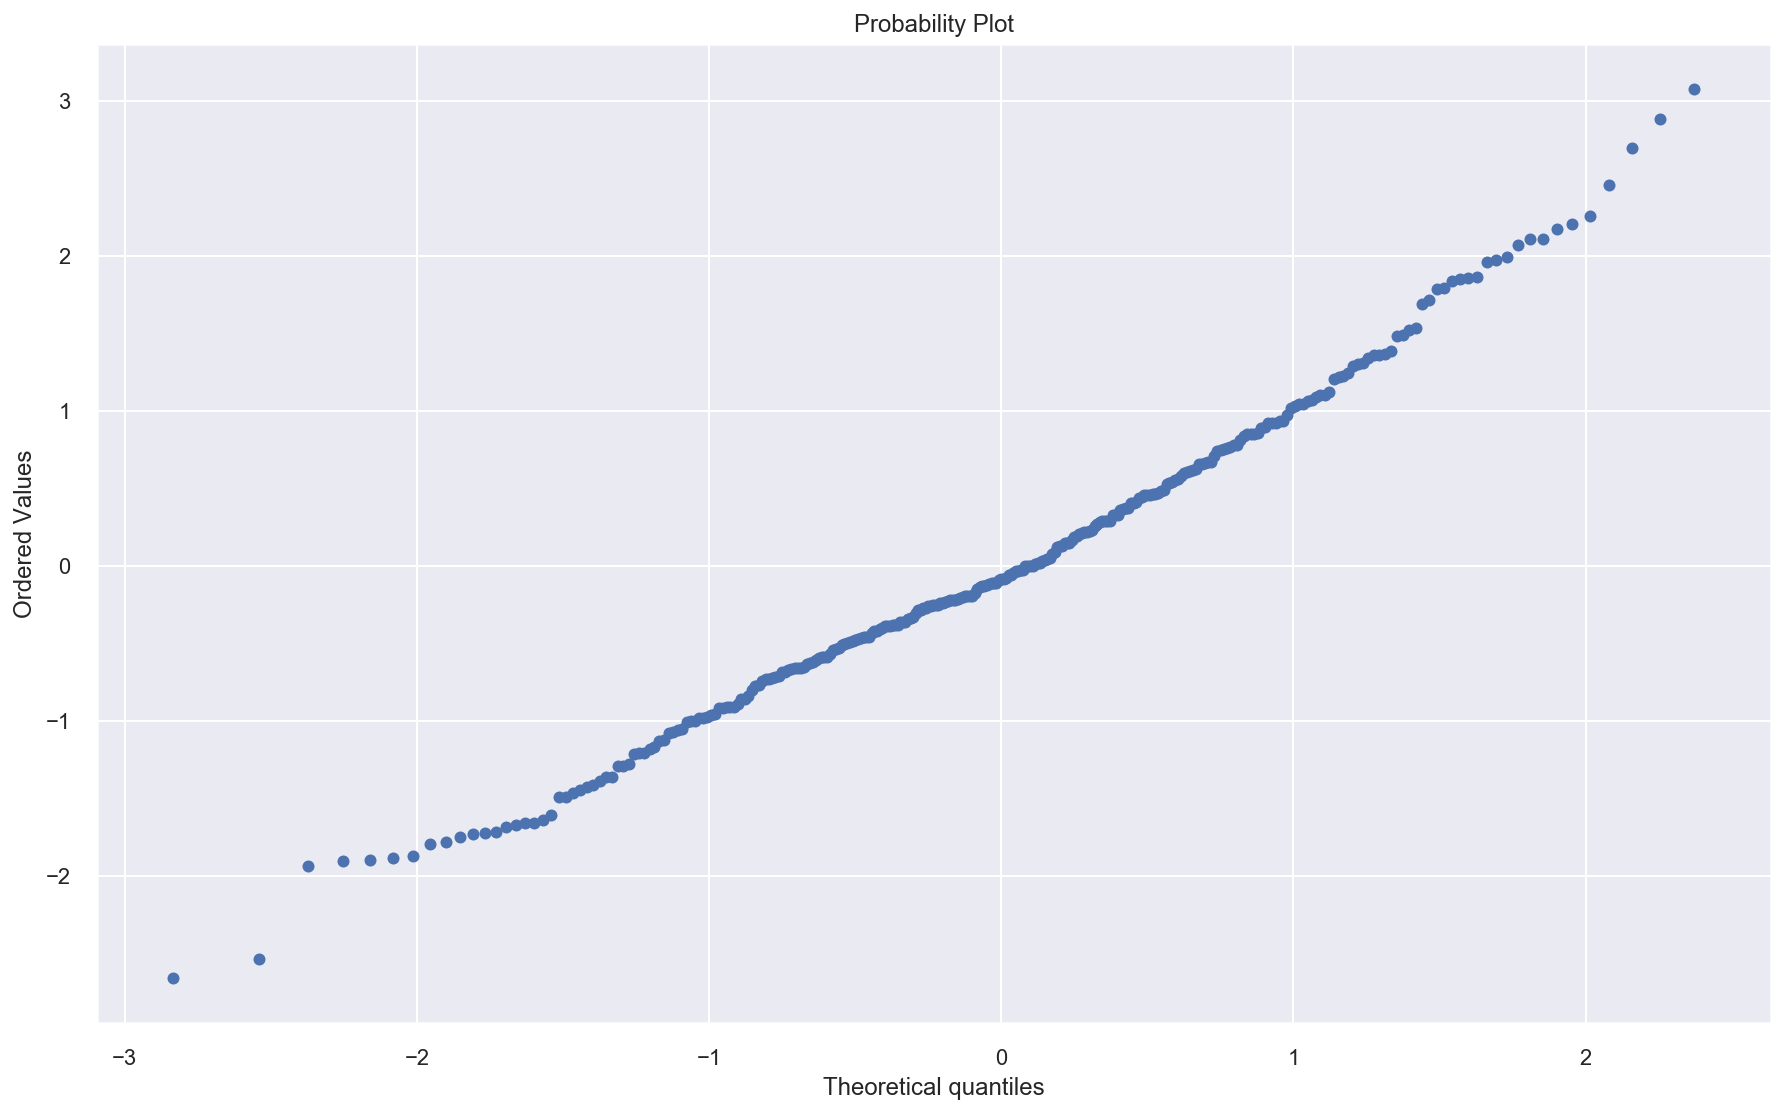

In [635]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lm.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

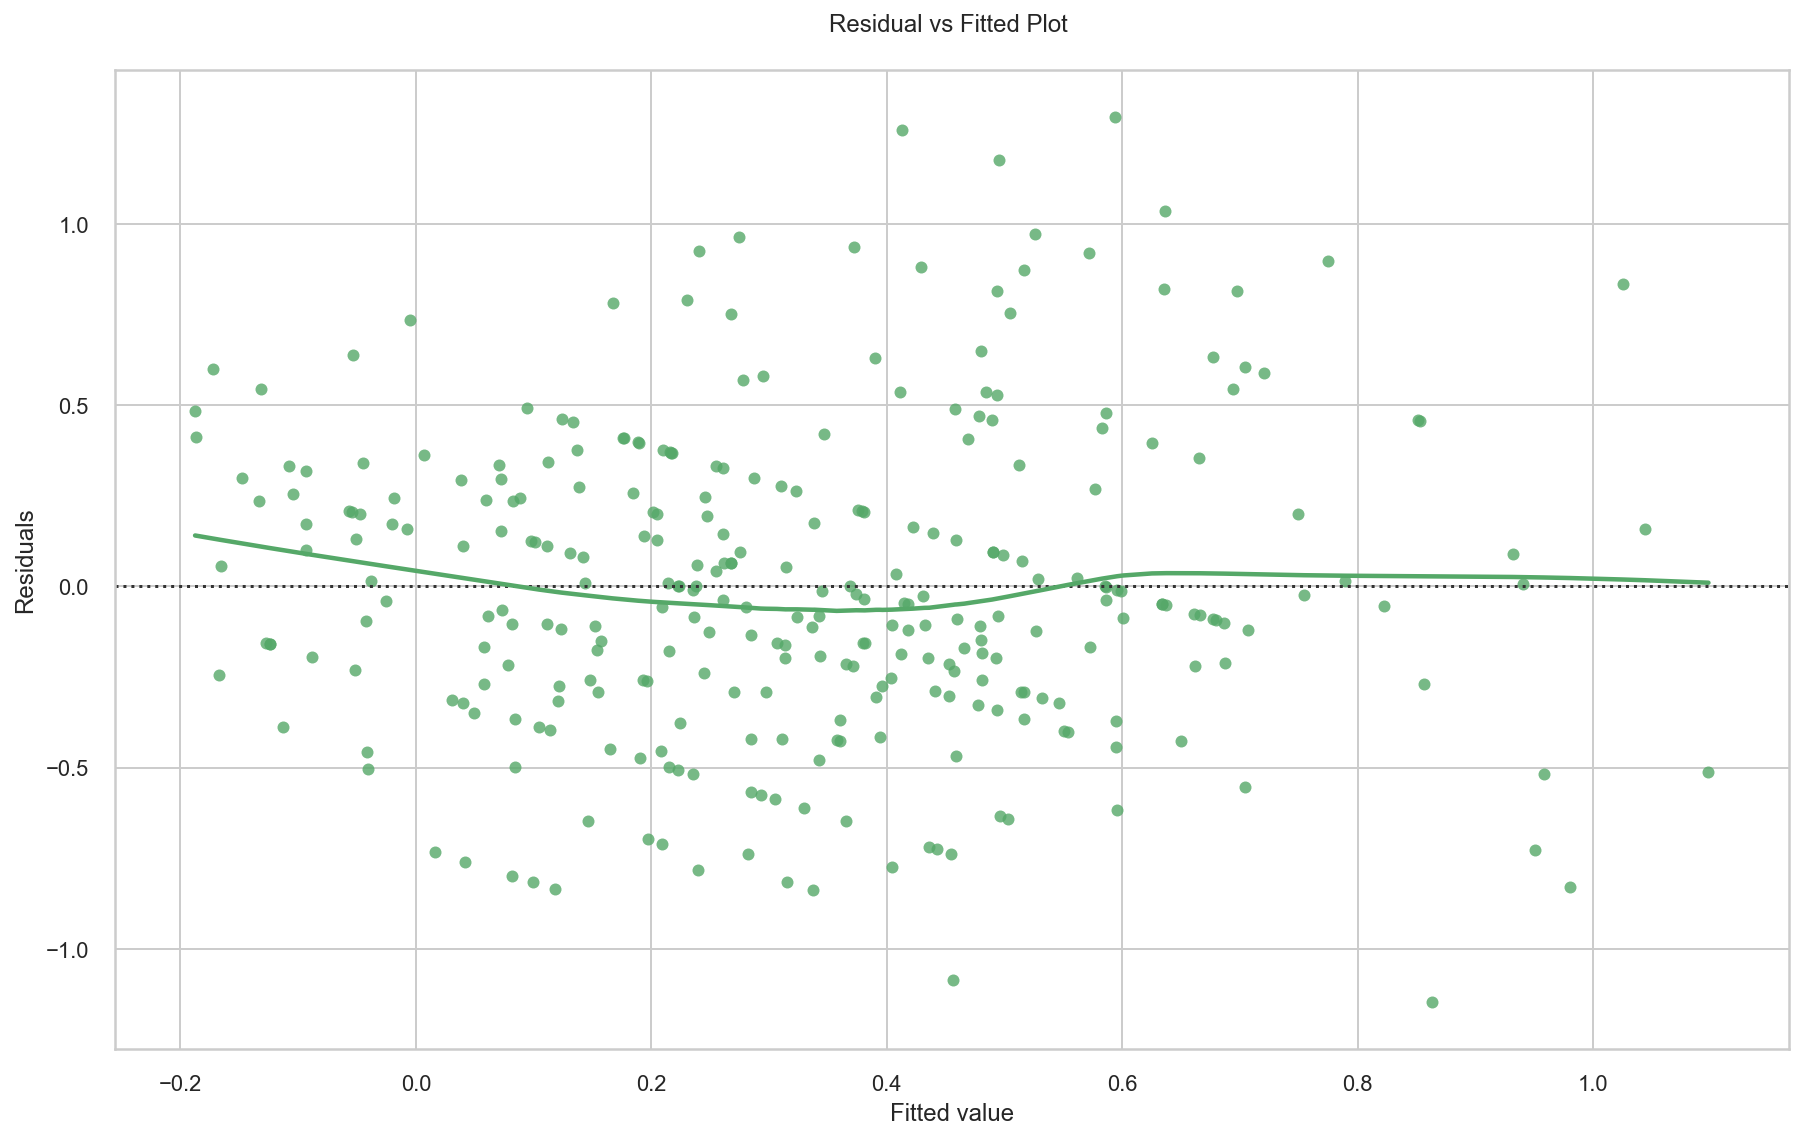

In [636]:
#residual plot
sns.set(style = 'whitegrid')

X['predictions1'] = lm.predict(X)
residuals = lm.resid

ax = sns.residplot(X['predictions1'], residuals, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()


# No autocorrelation

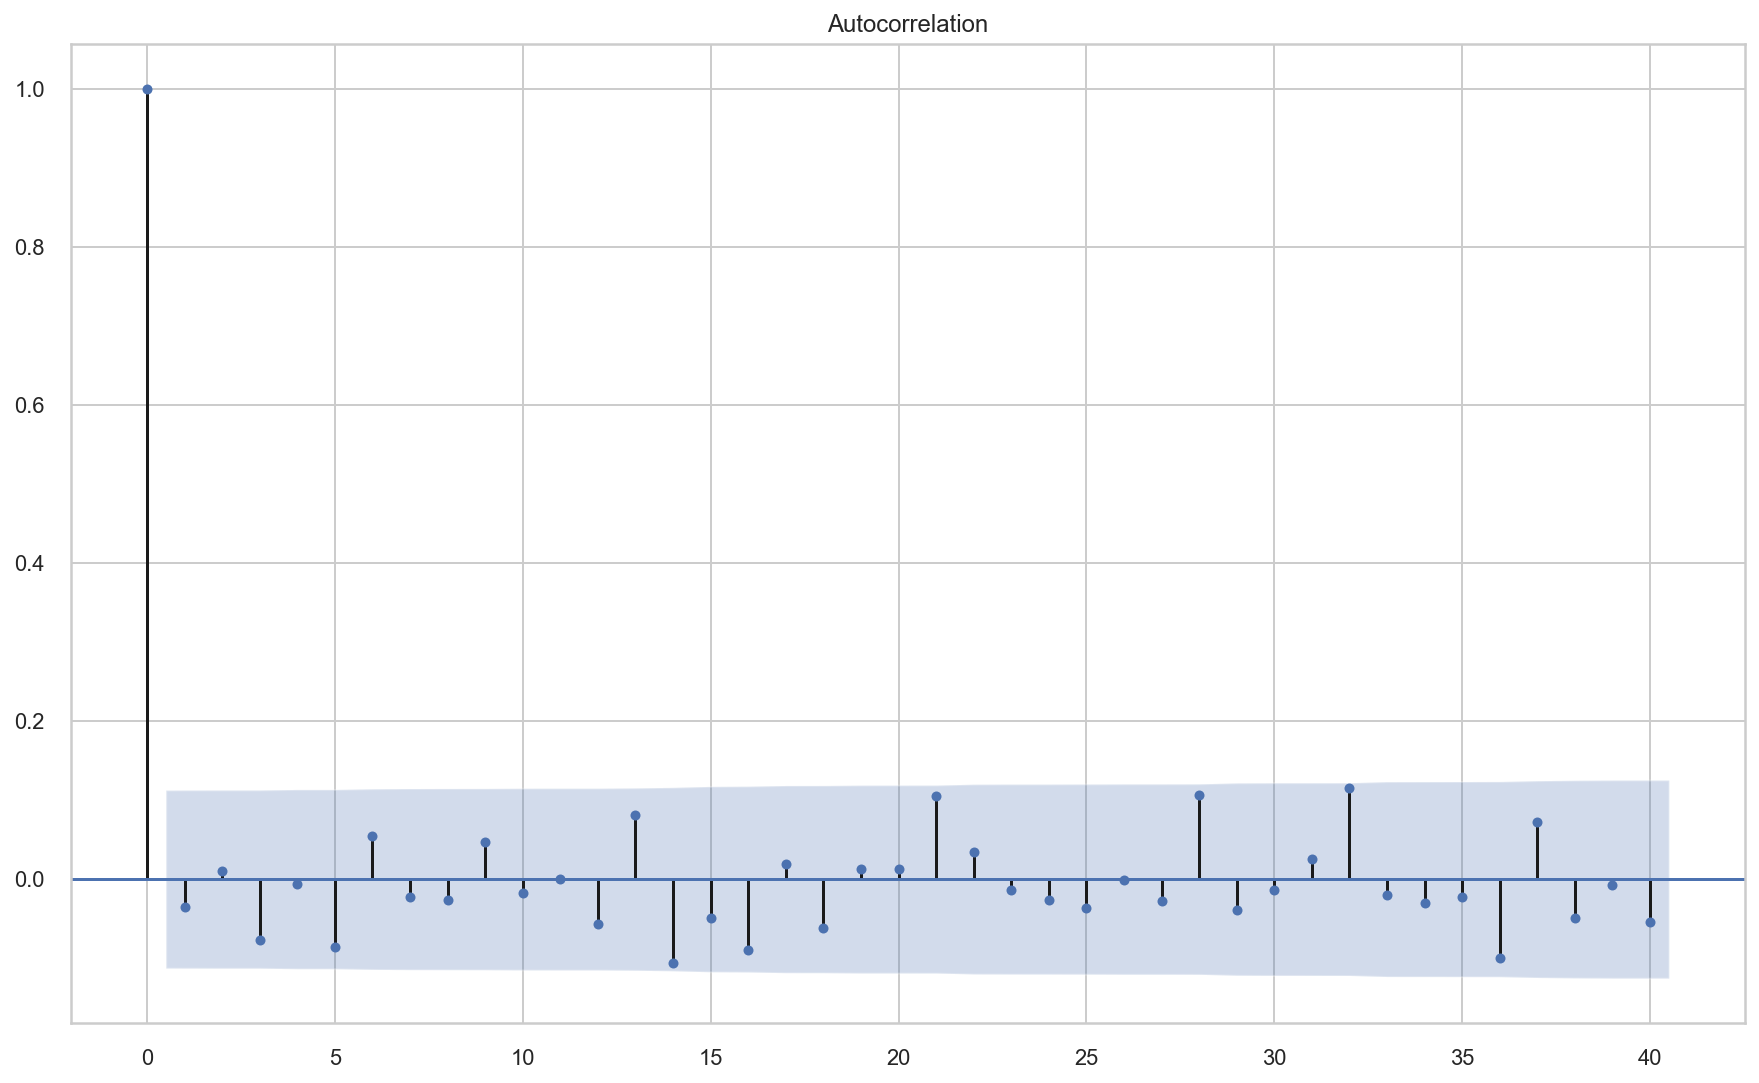

In [637]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lm.resid , lags=40 , alpha=0.05)
                            
acf.show()

no auto correlation

## HOMOscadastic

[('F statistic', 0.7295452037214444), ('p-value', 0.9568979361084551)]

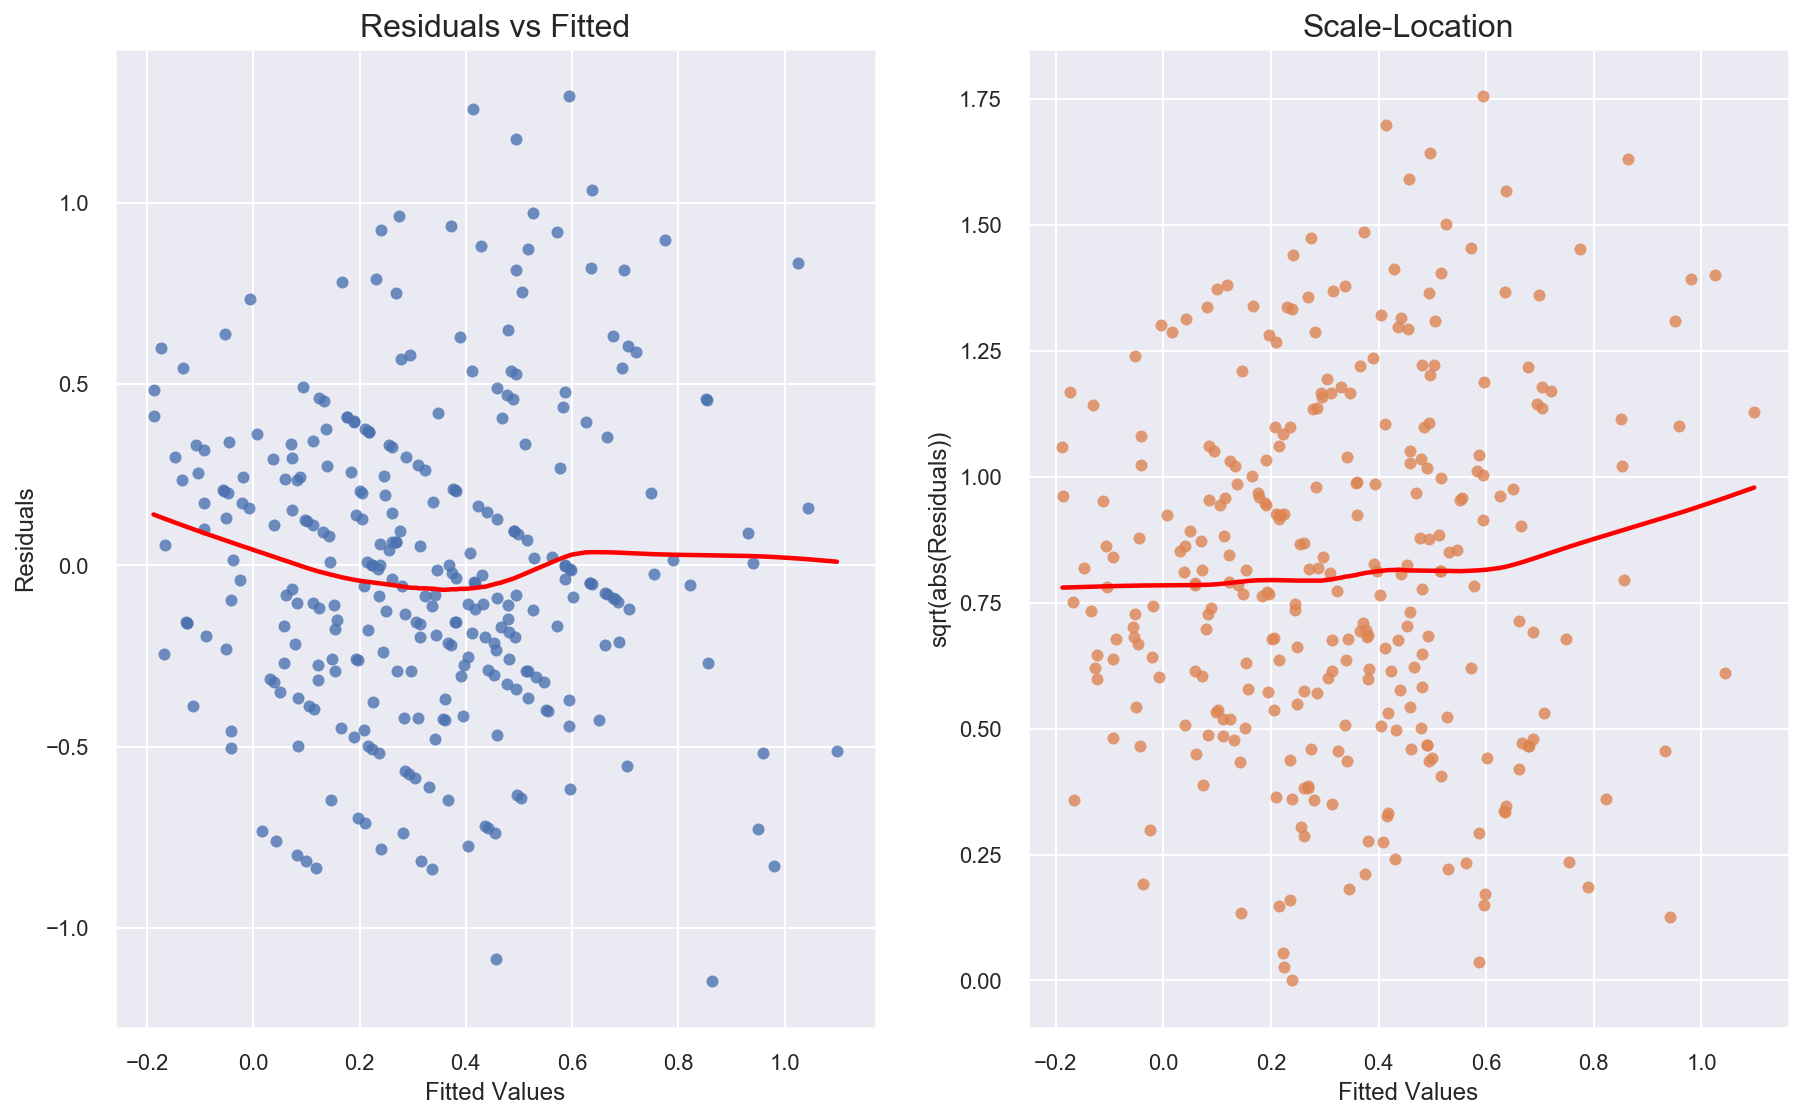

In [638]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

fitted_vals = lm.predict()
resids = lm.resid
resids_standardized = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(lm.resid, lm.model.exog)
lzip(name, test)

In [639]:
df.head()

,SlNo,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_M,Board_SSC_ICSE,Board_SSC_Others,Board_HSC_ISC,Board_HSC_Others,Stream_HSC_Commerce,Stream_HSC_Science,Course_Degree_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Entrance_Test_G-MAT,Entrance_Test_G-SAT,Entrance_Test_GCET,Entrance_Test_K-MAT,Entrance_Test_MAT,Entrance_Test_NO Exam,Entrance_Test_PGCET,Entrance_Test_XAT,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB
0,-1.727627,-0.242304,2.122640,-1.233456,-0.717830,0.002089,-0.490464,-1.195948,-0.471300,1.005320,0.368638,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,-1.718767,1.066802,1.011540,1.403341,0.783088,1.014028,0.788845,0.960009,0.229378,1.109806,-0.138113,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-1.709907,0.671239,1.245686,0.409489,-0.717830,-1.764787,-1.497834,-1.195948,-1.031841,-0.561985,0.151459,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-1.701048,-0.425012,-0.069744,-0.559657,-0.717830,0.644590,-0.661495,-0.742062,-0.331164,-0.248524,0.223852,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,-1.692188,-0.333658,-0.771306,-1.008856,0.783088,0.355465,-0.382715,-0.969005,-0.471300,0.273911,-0.282900,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [640]:
df.columns

Index(['SlNo', 'Percent_SSC', 'Percent_HSC', 'Percent_Degree',
       'Experience_Yrs', 'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
       'Marks_Projectwork', 'Marks_BOCA', 'Salary', 'Gender_M',
       'Board_SSC_ICSE', 'Board_SSC_Others', 'Board_HSC_ISC',
       'Board_HSC_Others', 'Stream_HSC_Commerce', 'Stream_HSC_Science',
       'Course_Degree_Commerce', 'Course_Degree_Computer Applications',
       'Course_Degree_Engineering', 'Course_Degree_Management',
       'Course_Degree_Others', 'Course_Degree_Science', 'Entrance_Test_G-MAT',
       'Entrance_Test_G-SAT', 'Entrance_Test_GCET', 'Entrance_Test_K-MAT',
       'Entrance_Test_MAT', 'Entrance_Test_NO Exam', 'Entrance_Test_PGCET',
       'Entrance_Test_XAT', 'Specialization_MBA_Marketing & HR',
       'Specialization_MBA_Marketing & IB'],
      dtype='object')

num =['SlNo', 'Percent_SSC', 'Percent_HSC', 'Percent_Degree',
       'Experience_Yrs', 'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
       'Marks_Projectwork', 'Marks_BOCA', 'Salary']
pd.

In [642]:
from sklearn.model_selection import train_test_split


In [643]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)


In [644]:
from sklearn.linear_model import LinearRegression

linear =LinearRegression()
model =linear.fit(X_train,y_train)

In [645]:
model.score(X_train,y_train)

0.25581387218276097

In [646]:
model.score(X_test,y_test)

0.1404407847237028

In [647]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.metrics import mean_absolute_error
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [648]:


sfs1 = sfs(clf,k_features = 10,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished

[2020-02-03 16:17:43] Features: 1/10 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished

[2020-02-03 16:17:43] Features: 2/10 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.2s finished

[2020-02-03 16:17:43] Features: 3/10 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

In [649]:
lambdas=np.linspace(0,5,100)
params={'alpha':lambdas}
model=Ridge(fit_intercept=True)
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='r2',n_jobs=-1)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)
grid_search.cv_results_
test_pred=grid_search.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_pred))
print('train r2',grid_search.score(X_train,y_train) ,'test r2',grid_search.score(X_test,y_test))


Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MSE 0.3995019920081469
train r2 0.24361897630333684 test r2 0.15434457981222793


In [650]:
lambdas=np.linspace(1500,2000,10)
params={'alpha':lambdas}
model=Lasso(fit_intercept=True)
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='r2',n_jobs=-1)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)
grid_search.cv_results_
test_pred=grid_search.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_pred))
print('train r2',grid_search.score(X_train,y_train) ,'test r2',grid_search.score(X_test,y_test))


Lasso(alpha=1500.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MSE 0.4162335989045069
train r2 0.0 test r2 -0.002765225908867075


In [651]:
grid_search.best_estimator_

Lasso(alpha=1500.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [652]:

lasso = grid_search.best_estimator_
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
lasso.coef_,coeff_used


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0., -0.,
         0., -0., -0.,  0.,  0., -0.,  0.]), 0)

In [653]:
coeff_used = np.sum(lasso.coef_!=0)
lasso.coef_,coeff_used

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0., -0.,
         0., -0., -0.,  0.,  0., -0.,  0.]), 0)

MSE 0.4026091976270787
train r2 0.21249878852467255 test r2 0.14049379799845252


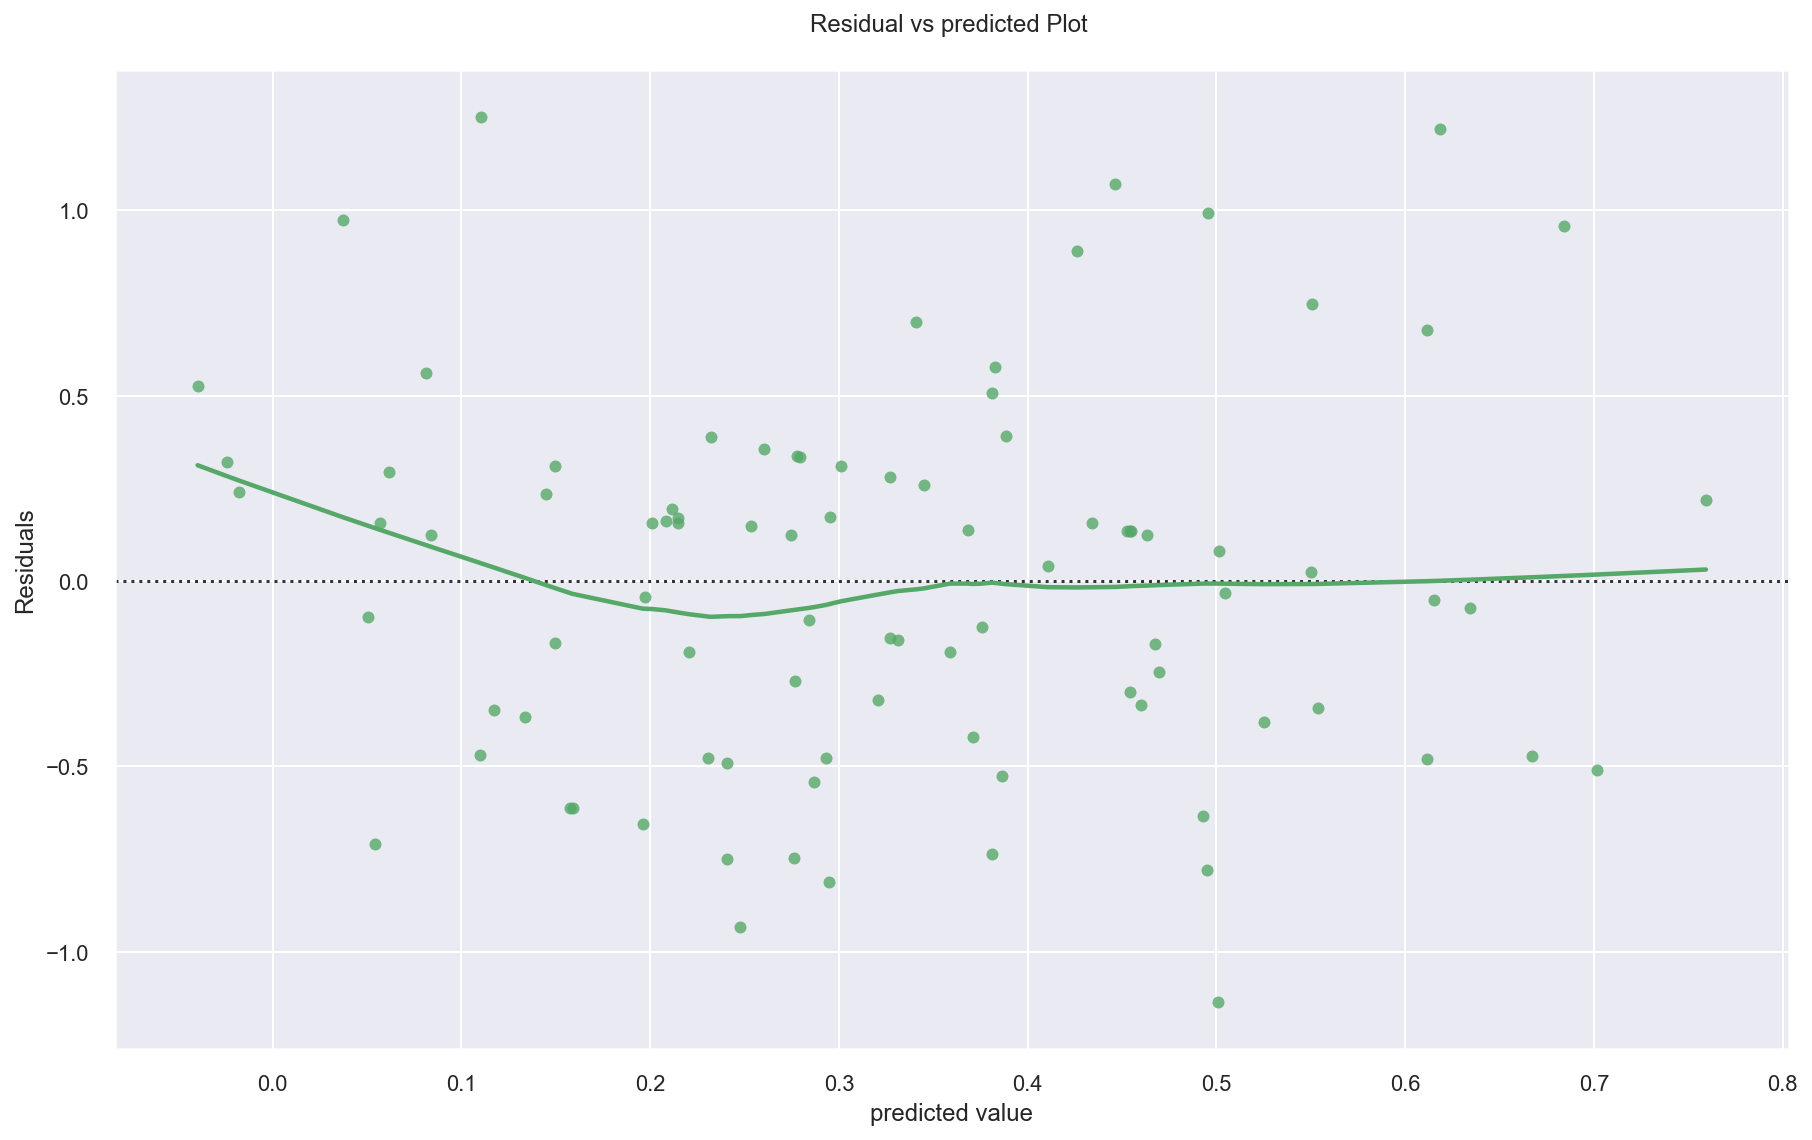

(28, None)

In [654]:
model1=RidgeCV(alphas=(0,25,26,27,28),fit_intercept=True,scoring='r2',cv=10)#gcv_mode = ( 'svd', 'eigen')
model1.fit(X_train,y_train)
test_predcv =model1.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_predcv))
print('train r2',model1.score(X_train,y_train) ,'test r2',model1.score(X_test,y_test))
resid = y_test -test_predcv
ax = sns.residplot(test_predcv, resid, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'predicted value', ylabel = 'Residuals', title = 'Residual vs predicted Plot \n')
plt.show()

model1.alpha_,model1.gcv_mode

MSE 0.4162335989045069
train r2 0.0 test r2 -0.002765225908867075
1550


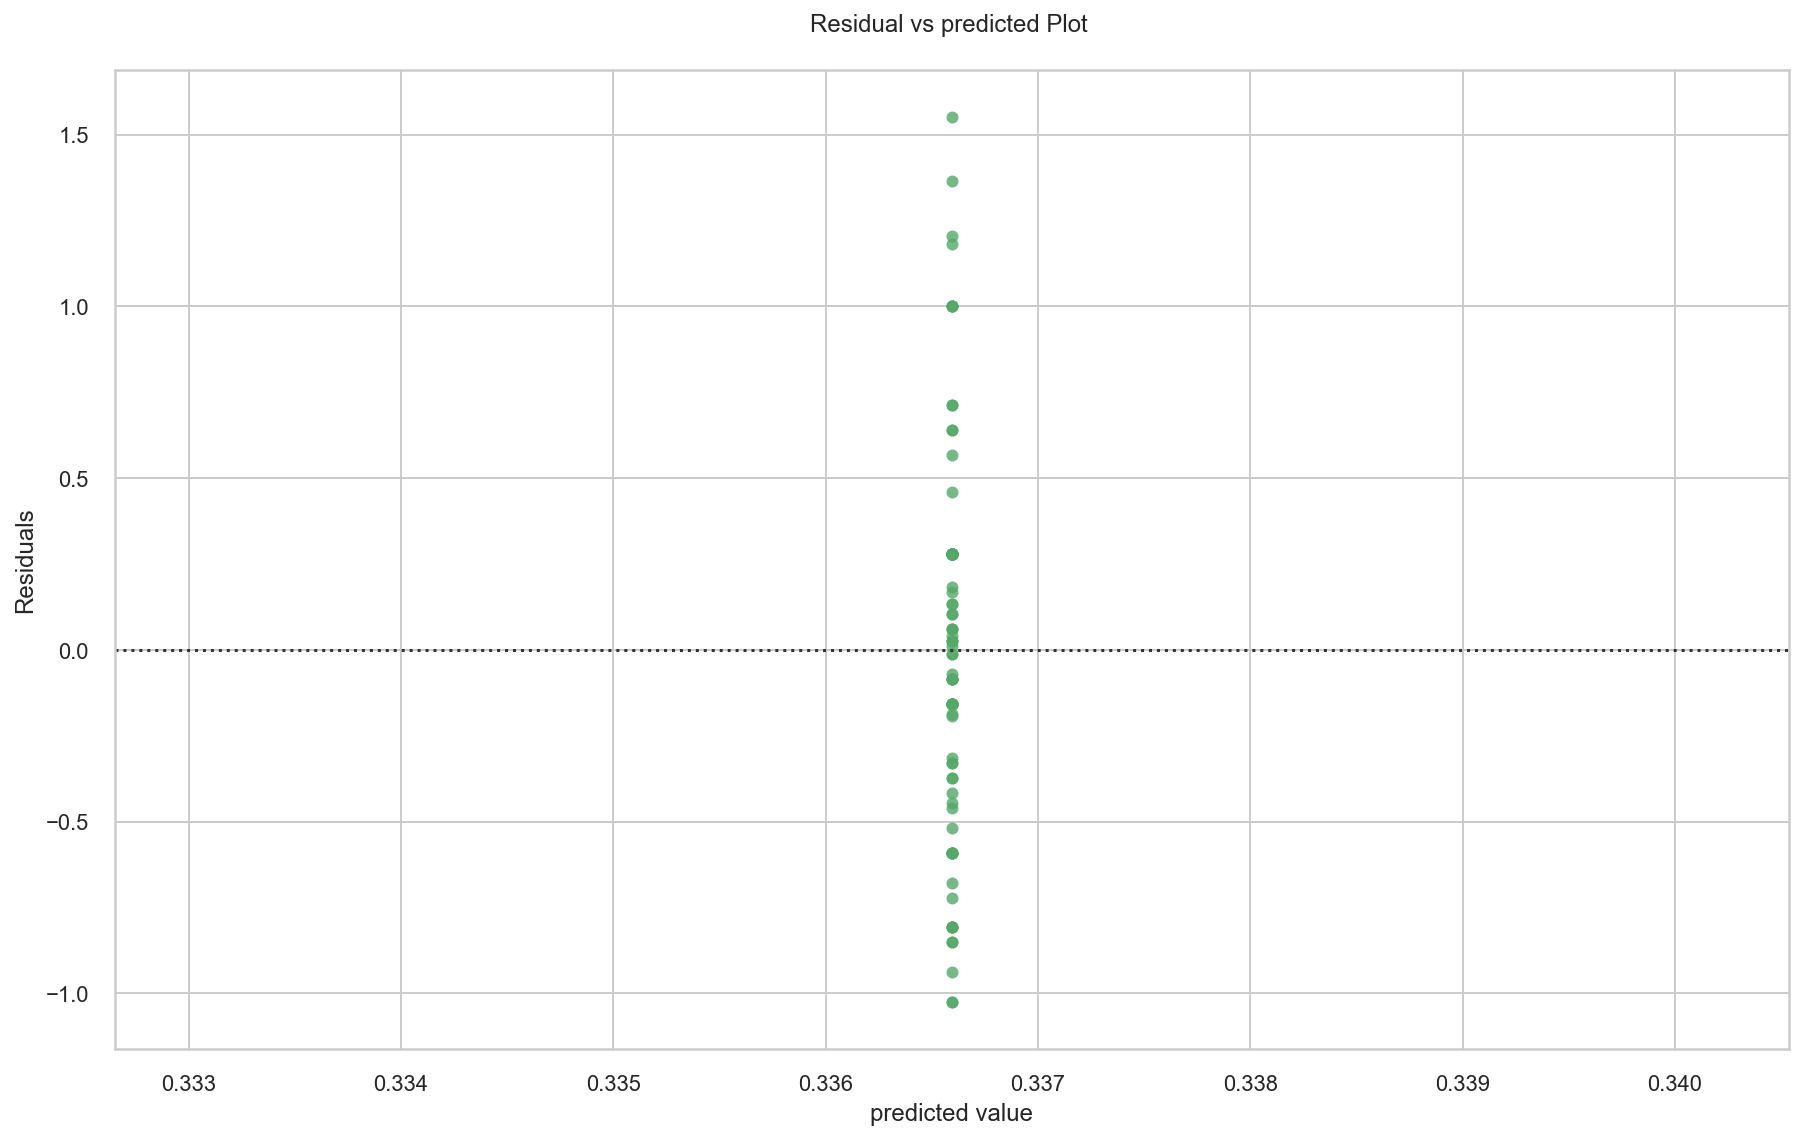

Wall time: 1.01 s


(1550,)

In [655]:
%%time
model2=LassoCV(eps=0.001,
    n_alphas=100, alphas=(1550,1480,1445,1450),fit_intercept=True,cv=10)
model2.fit(X_train,y_train)
test_predcv =model2.predict(X_test)
print('MSE',mean_absolute_error(y_test,test_predcv))
print('train r2',model2.score(X_train,y_train) ,'test r2',model2.score(X_test,y_test))
print(model2.alpha_)
resid = y_test -test_predcv


#residual plot
sns.set(style = 'whitegrid')


ax = sns.residplot(test_predcv, resid, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'predicted value', ylabel = 'Residuals', title = 'Residual vs predicted Plot \n')
plt.show()
model2.alpha_,

In [656]:
from sklearn.feature_selection import RFE


In [657]:
rfe = RFE(linear, 7)

In [658]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False  True False False False  True
  True  True False False False False False  True False False False False
 False False False False False  True False False False False  True]
[29 25 18 21 19 22 11  1  2 27 28  1  1  1  4  9 14 13 10  1 15 16  3  5
 26  8  6 23 17  1 20 12  7 24  1]


In [659]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 1
Score with 1 features: 0.331795


In [660]:
from pyod.models.knn import KNN


In [661]:
#clf = KNN()
#clf.fit(df)

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(df)

ValueError: could not convert string to float: 'M'

In [17]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativImputer# 

In [ ]:

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
IterativeImputer(random_state=0)
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
imp_mean.transform(X)
array([[ 6.9584...,  2.       ,  3.        ],
       [ 4.       ,  2.6000...,  6.        ],
       [10.       ,  4.9999...,  9.        ]])